In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score,confusion_matrix,roc_auc_score

In [2]:
df= pd.read_csv('D:/mentorness ML internship/train_data.csv')

In [3]:
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [5]:
df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


# 1. Distribution of the Target Variable (Credit Card Approval)


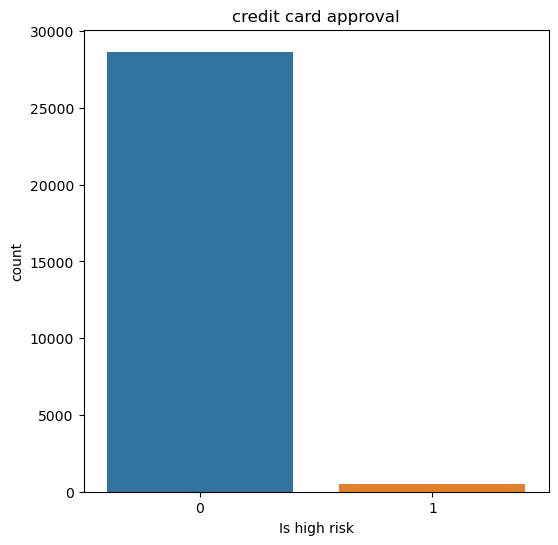

In [6]:
plt.figure(figsize=(6,6))
sns.countplot(x="Is high risk", data=df)
plt.title('credit card approval')
plt.show()

# 1. EDA: Distribution of numeric variable (univariate)


In [7]:
#variable that holds the names of columns in the DataFrame df that have numeric data types.
numeric_features= df.select_dtypes(include=[np.number]).columns

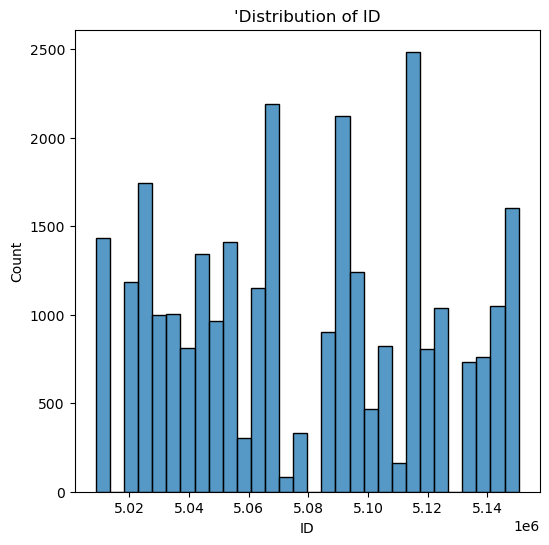

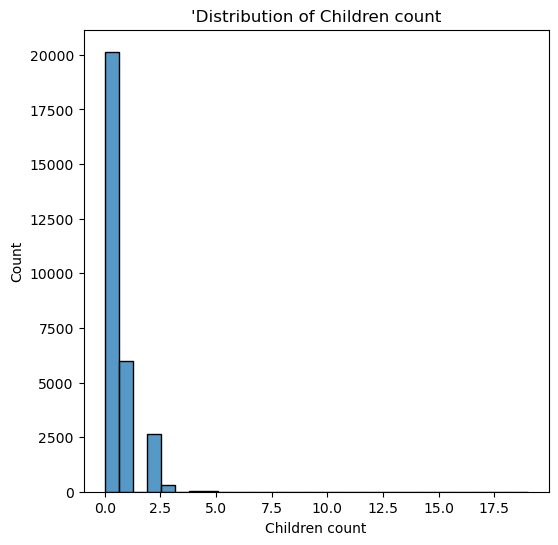

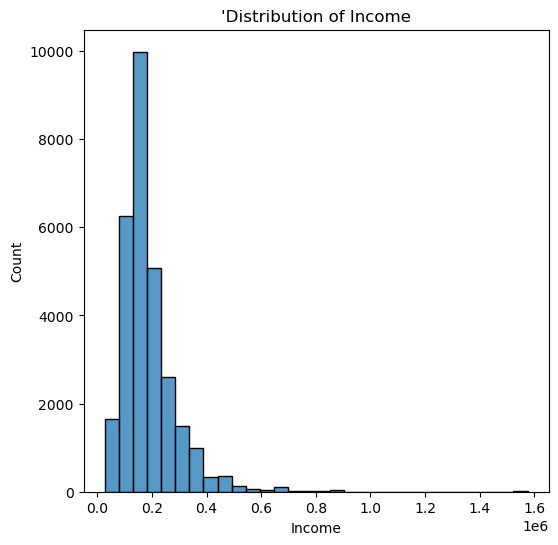

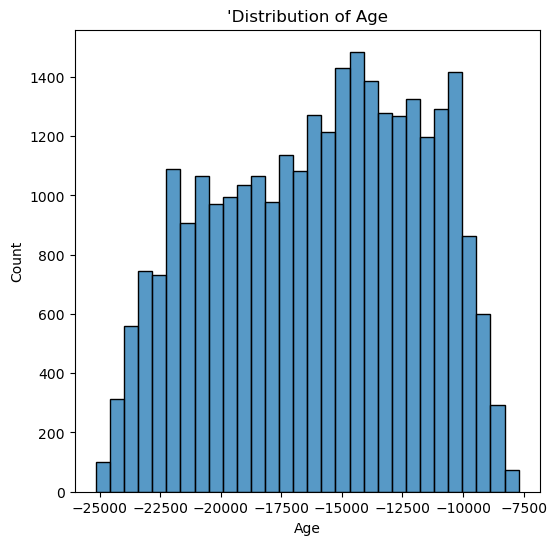

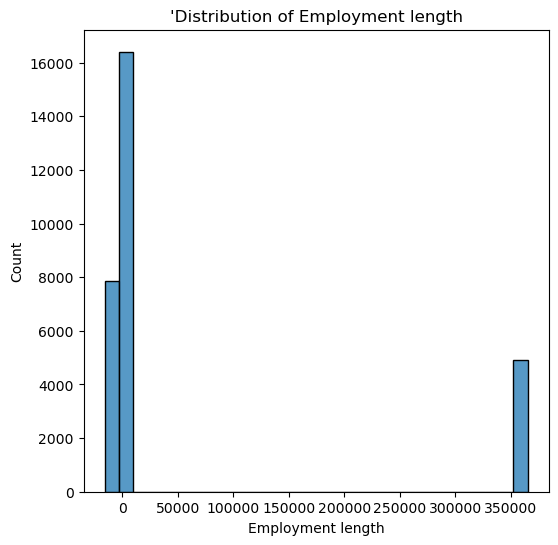

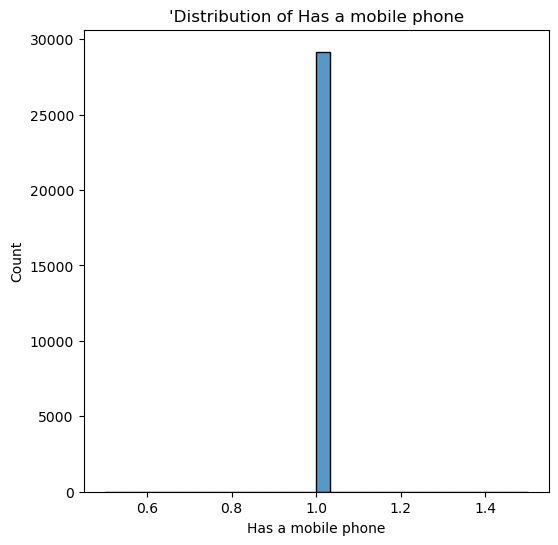

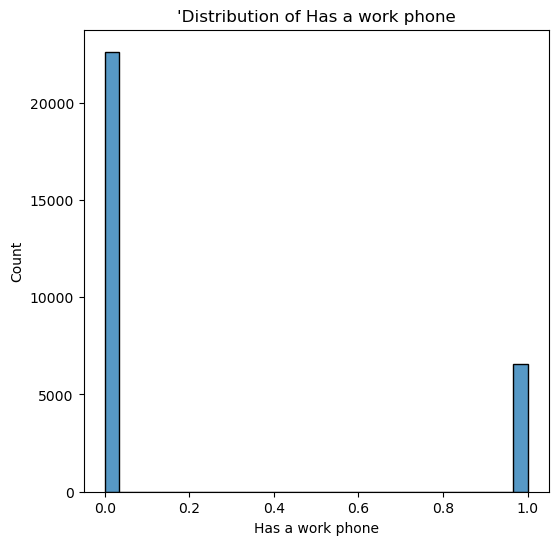

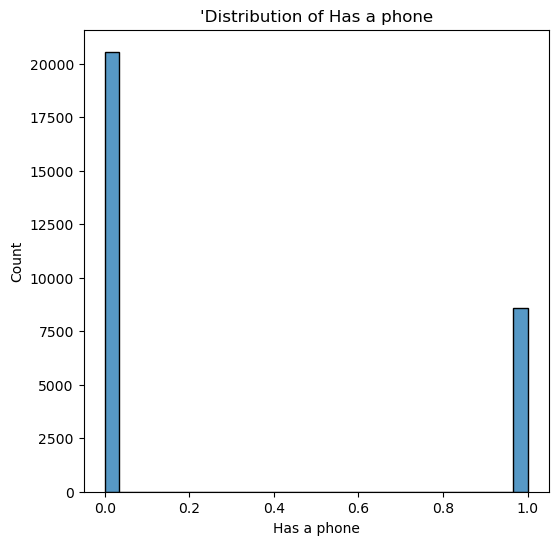

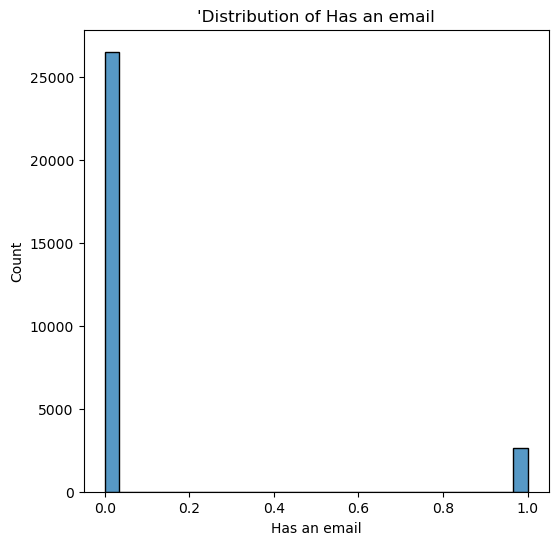

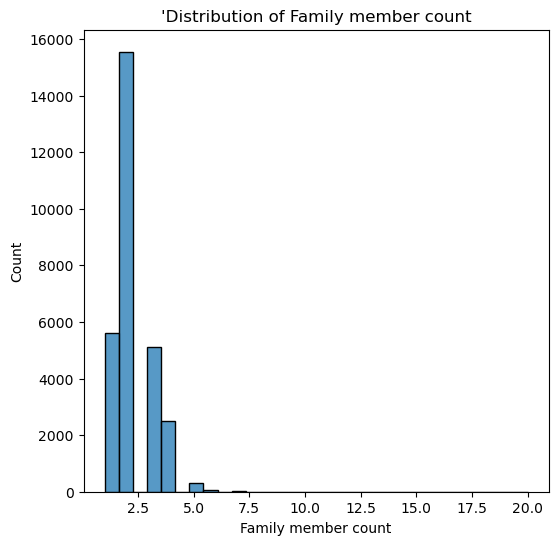

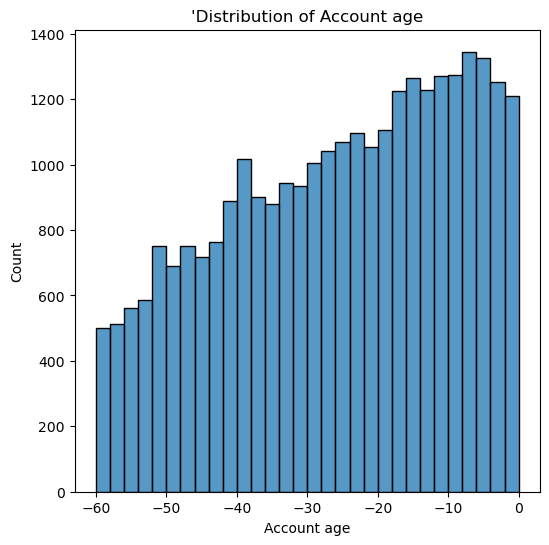

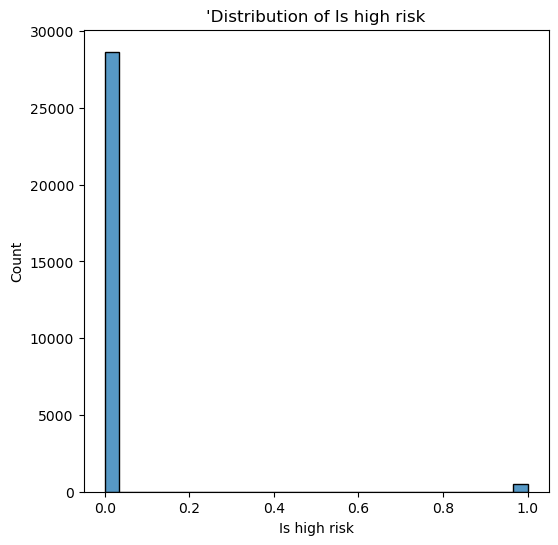

In [8]:

for feature in numeric_features:
    plt.figure(figsize=(6,6))
    sns.histplot(df[feature], bins=30)
    plt.title(f"'Distribution of {feature}")
    plt.show()

# 1. EDA: Distribution of categorical variable (Bivariate)


In [9]:
categorical_features=df.select_dtypes(include=['object']).columns
categorical_features

Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object')

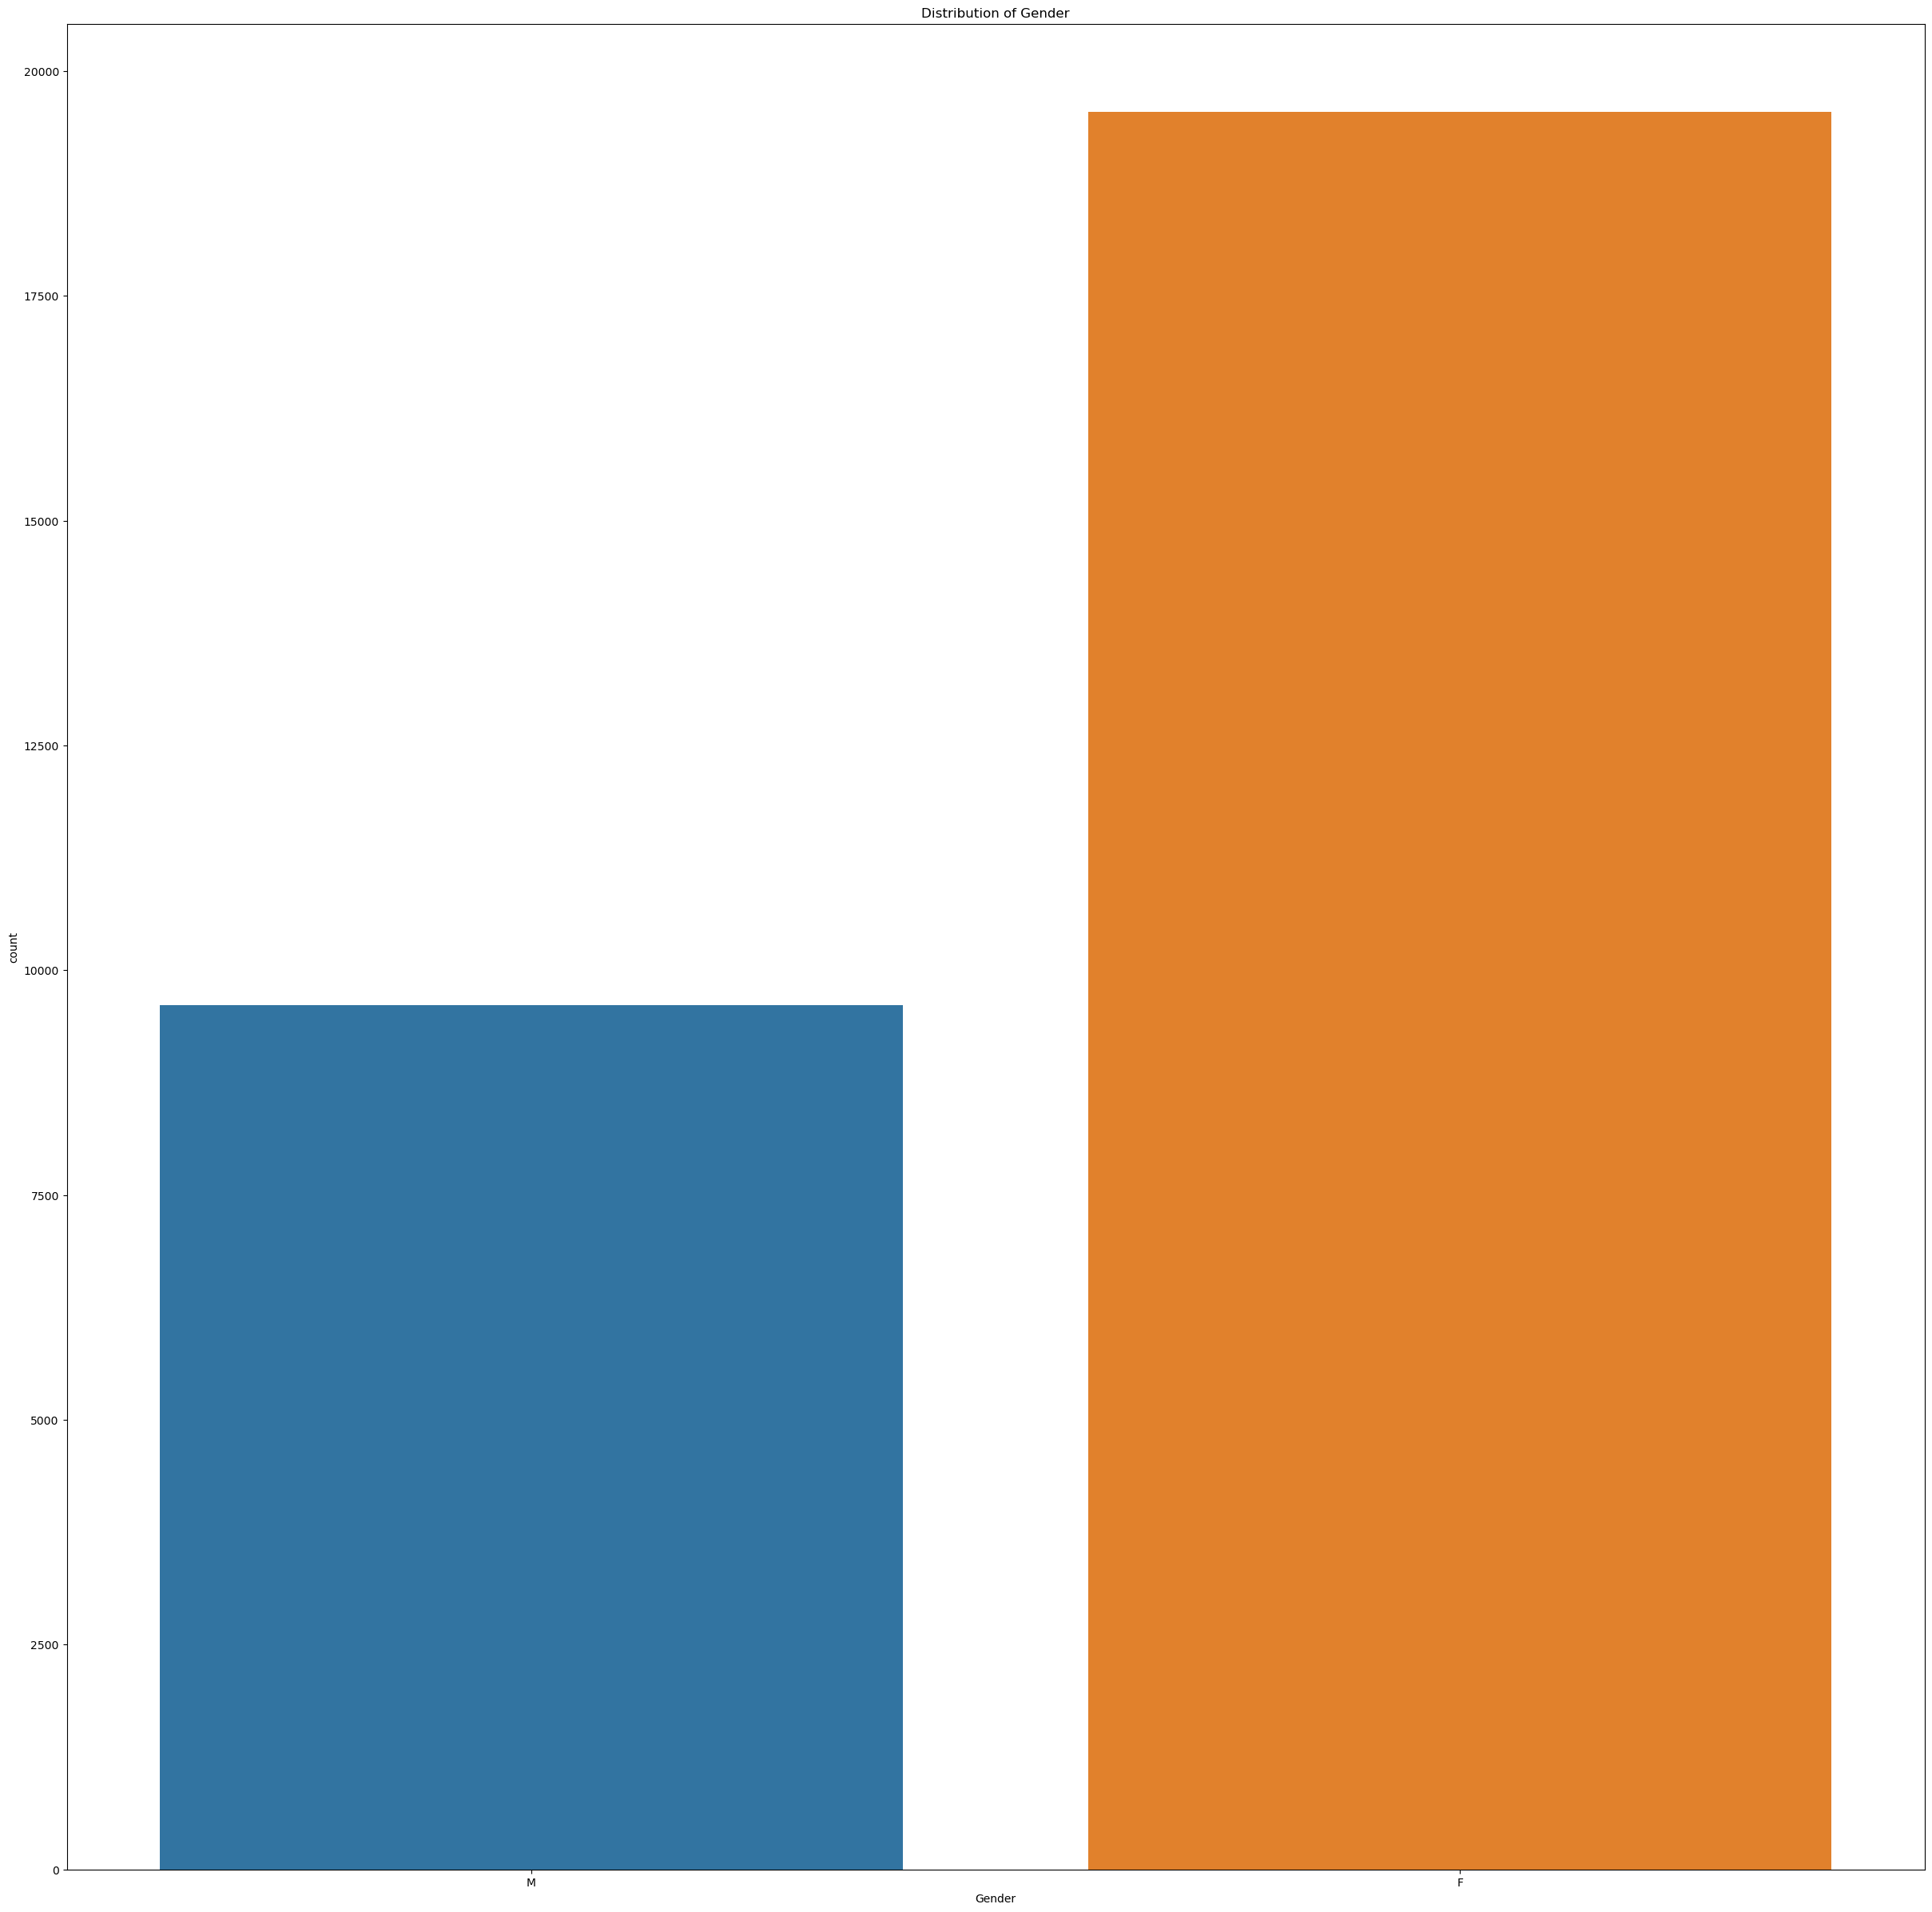

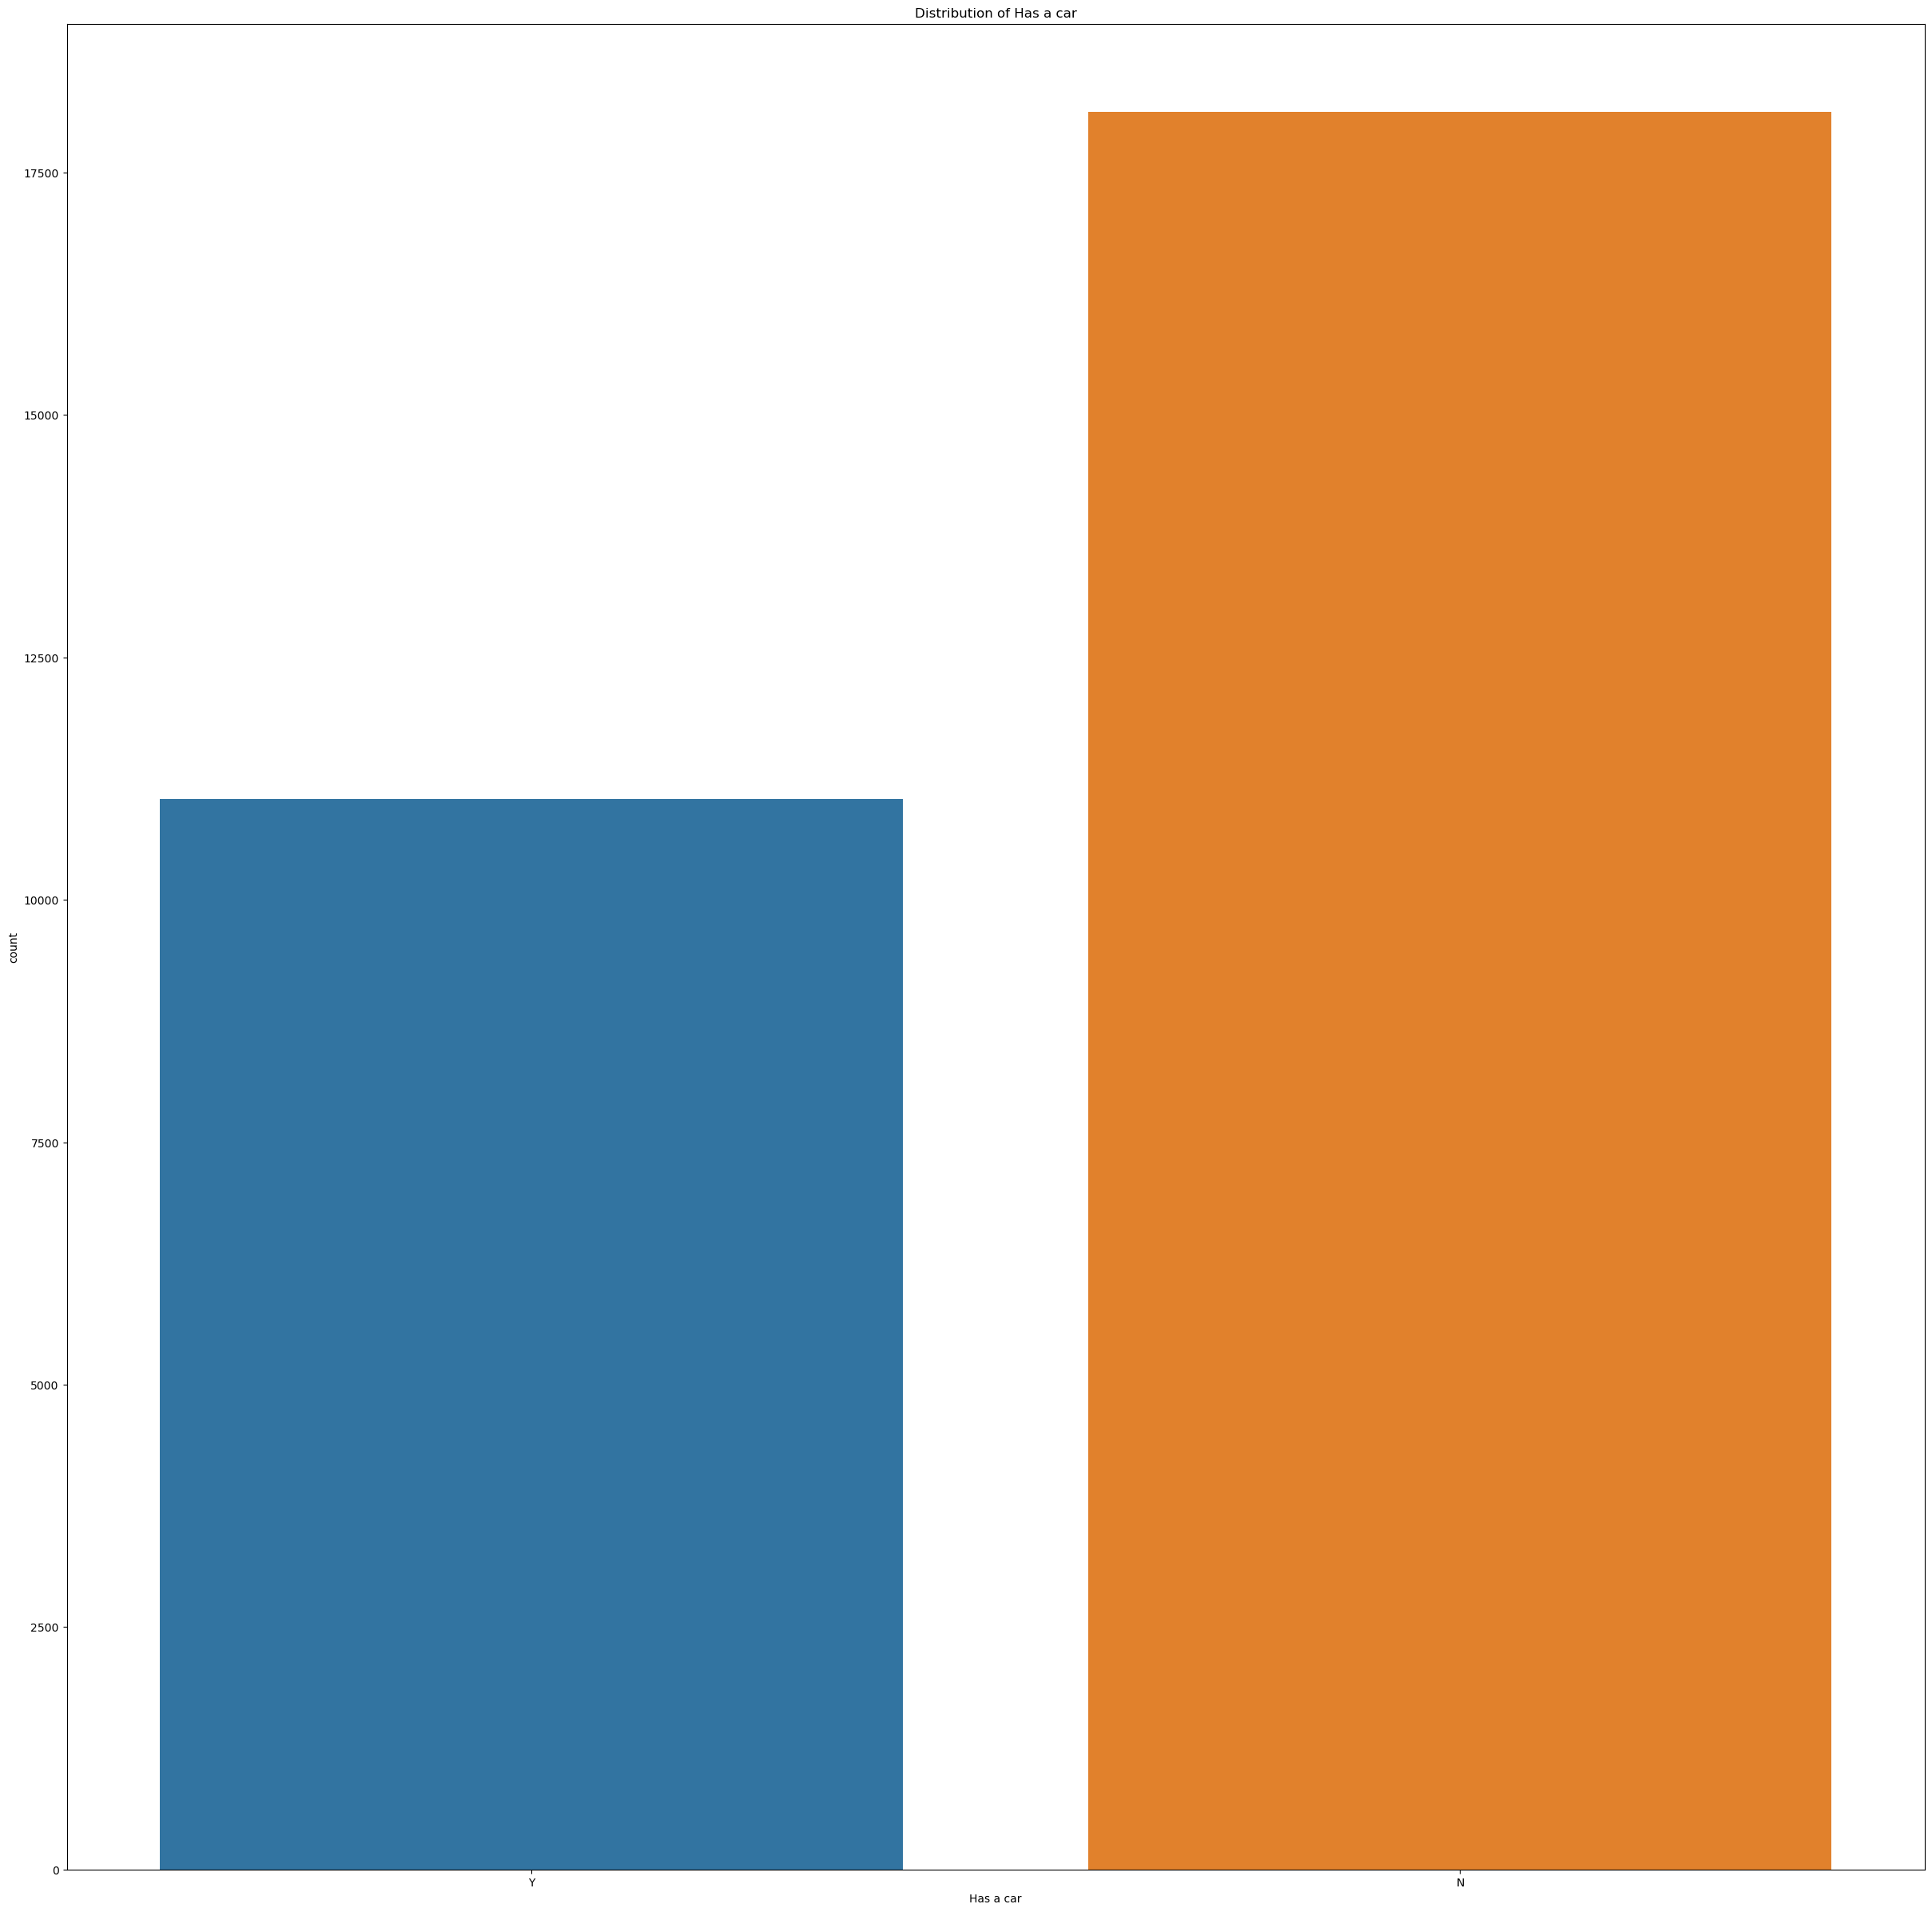

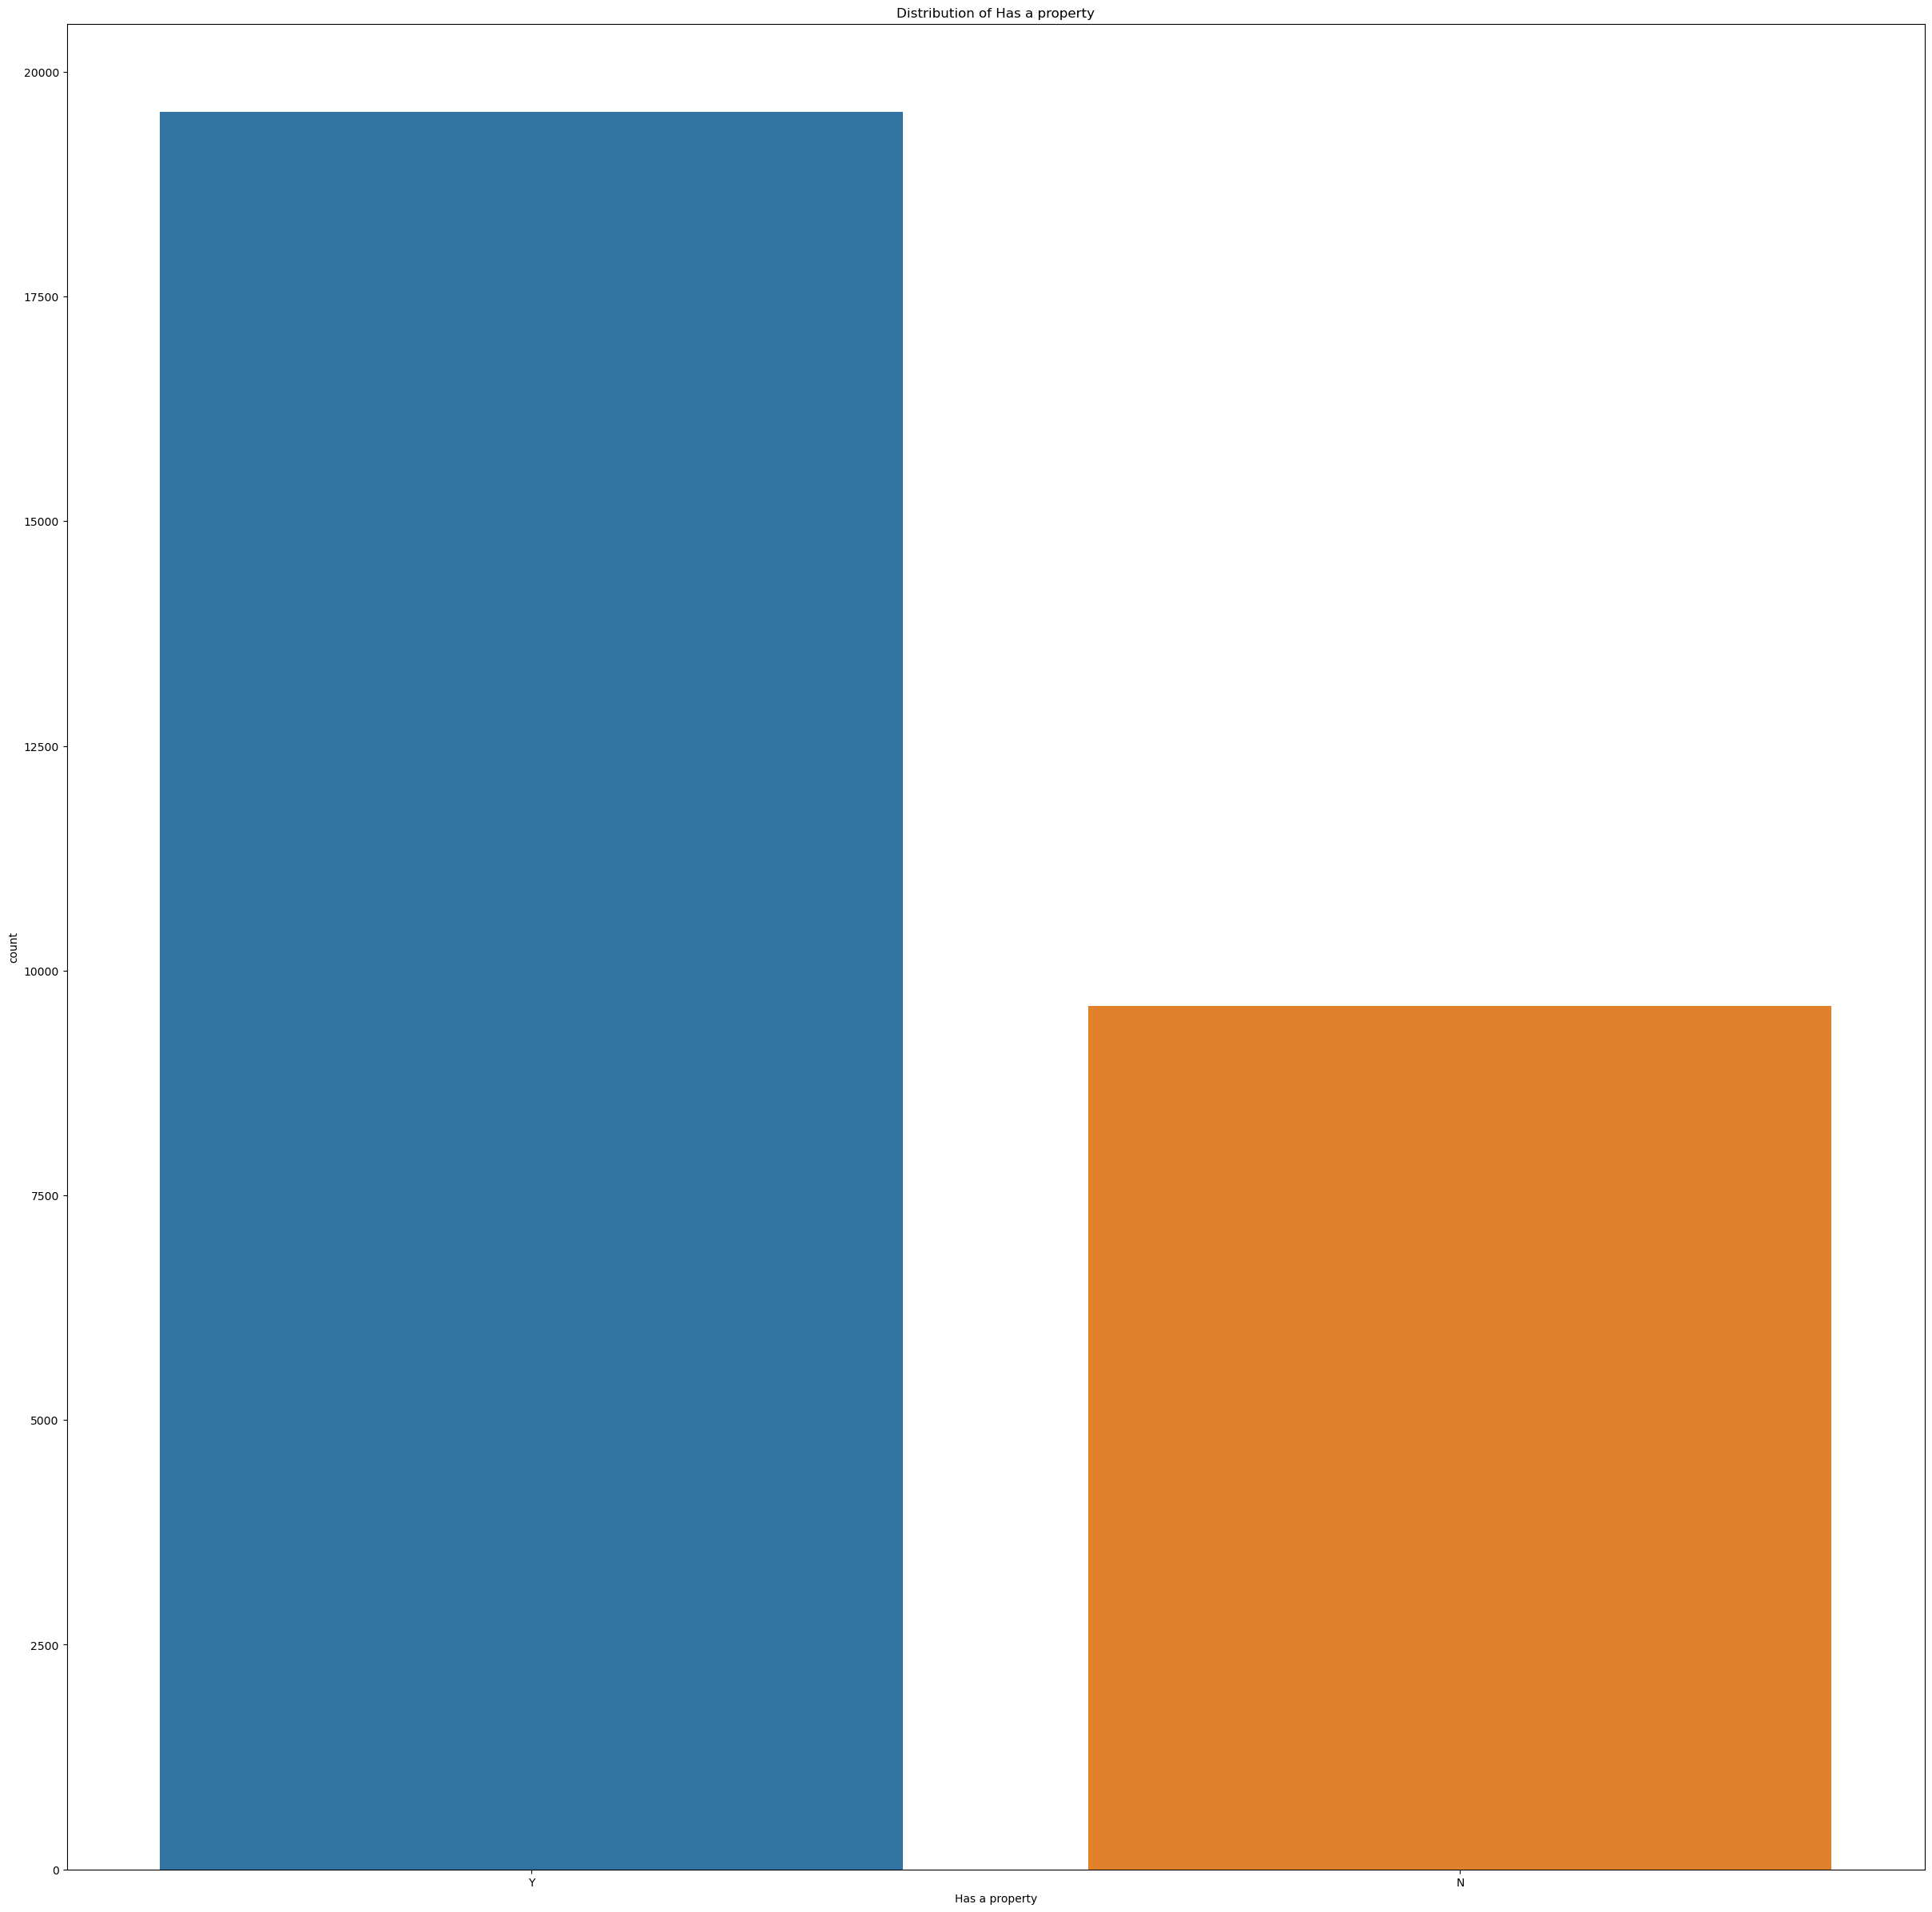

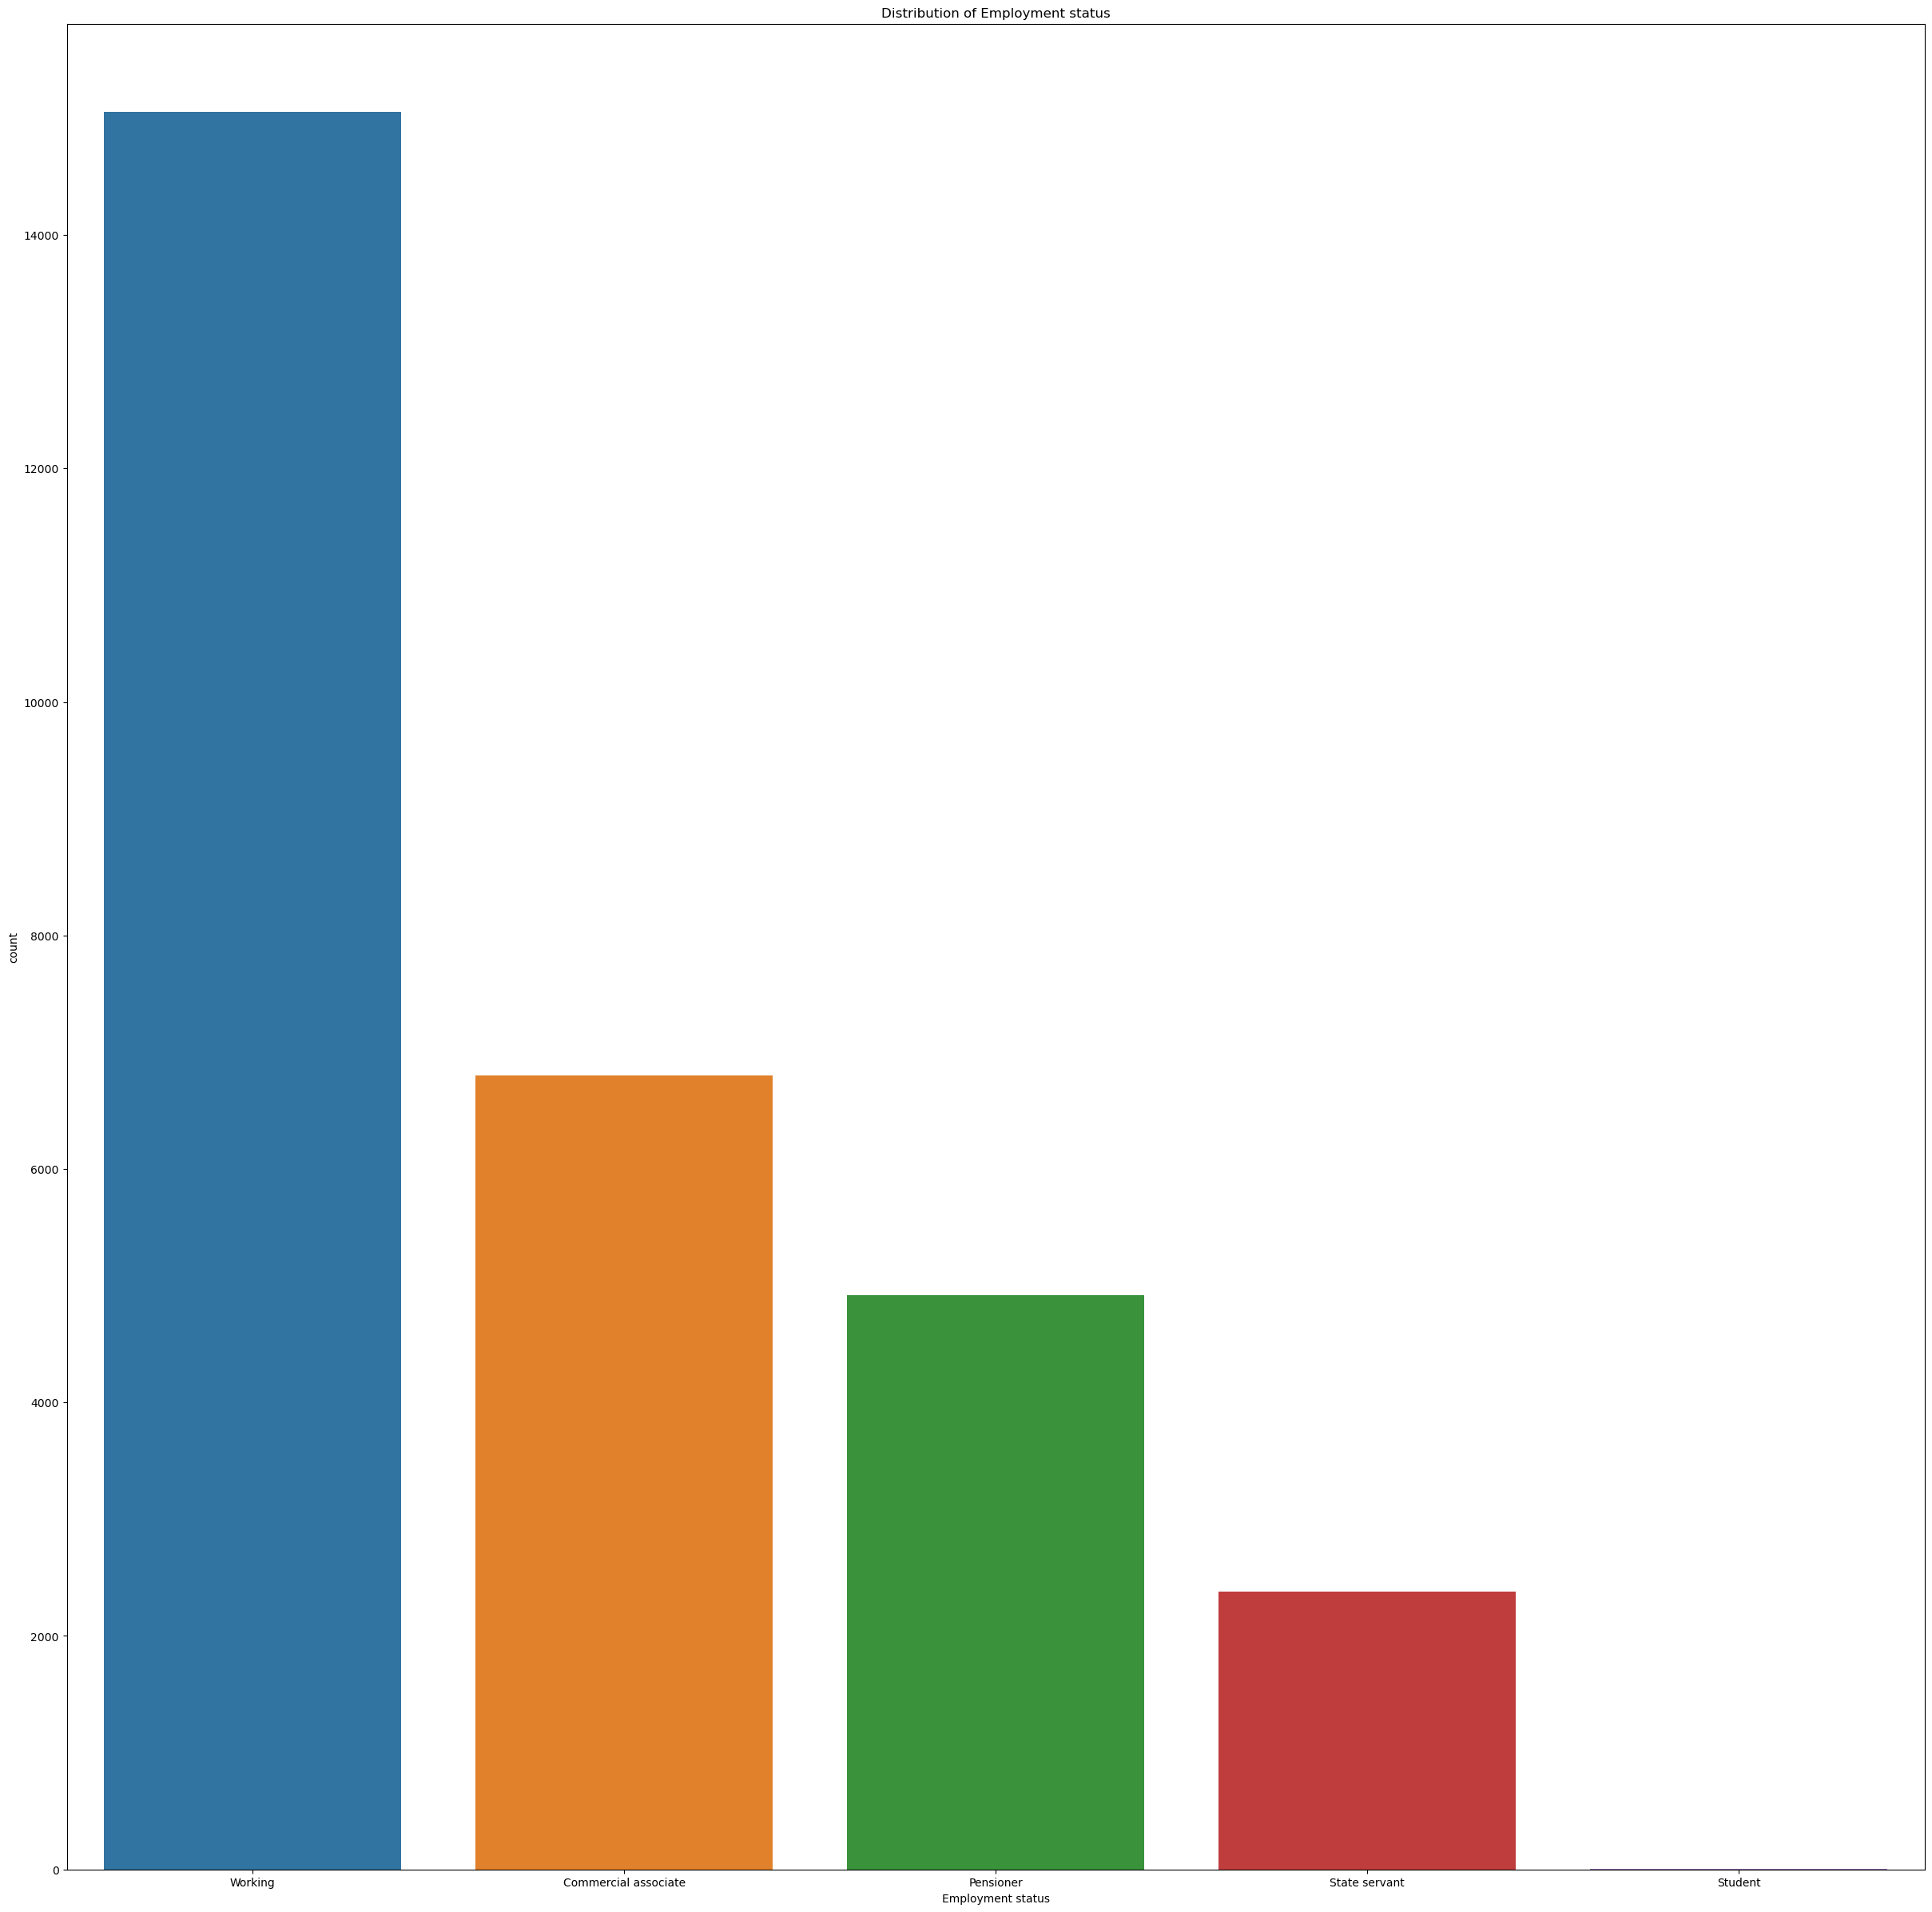

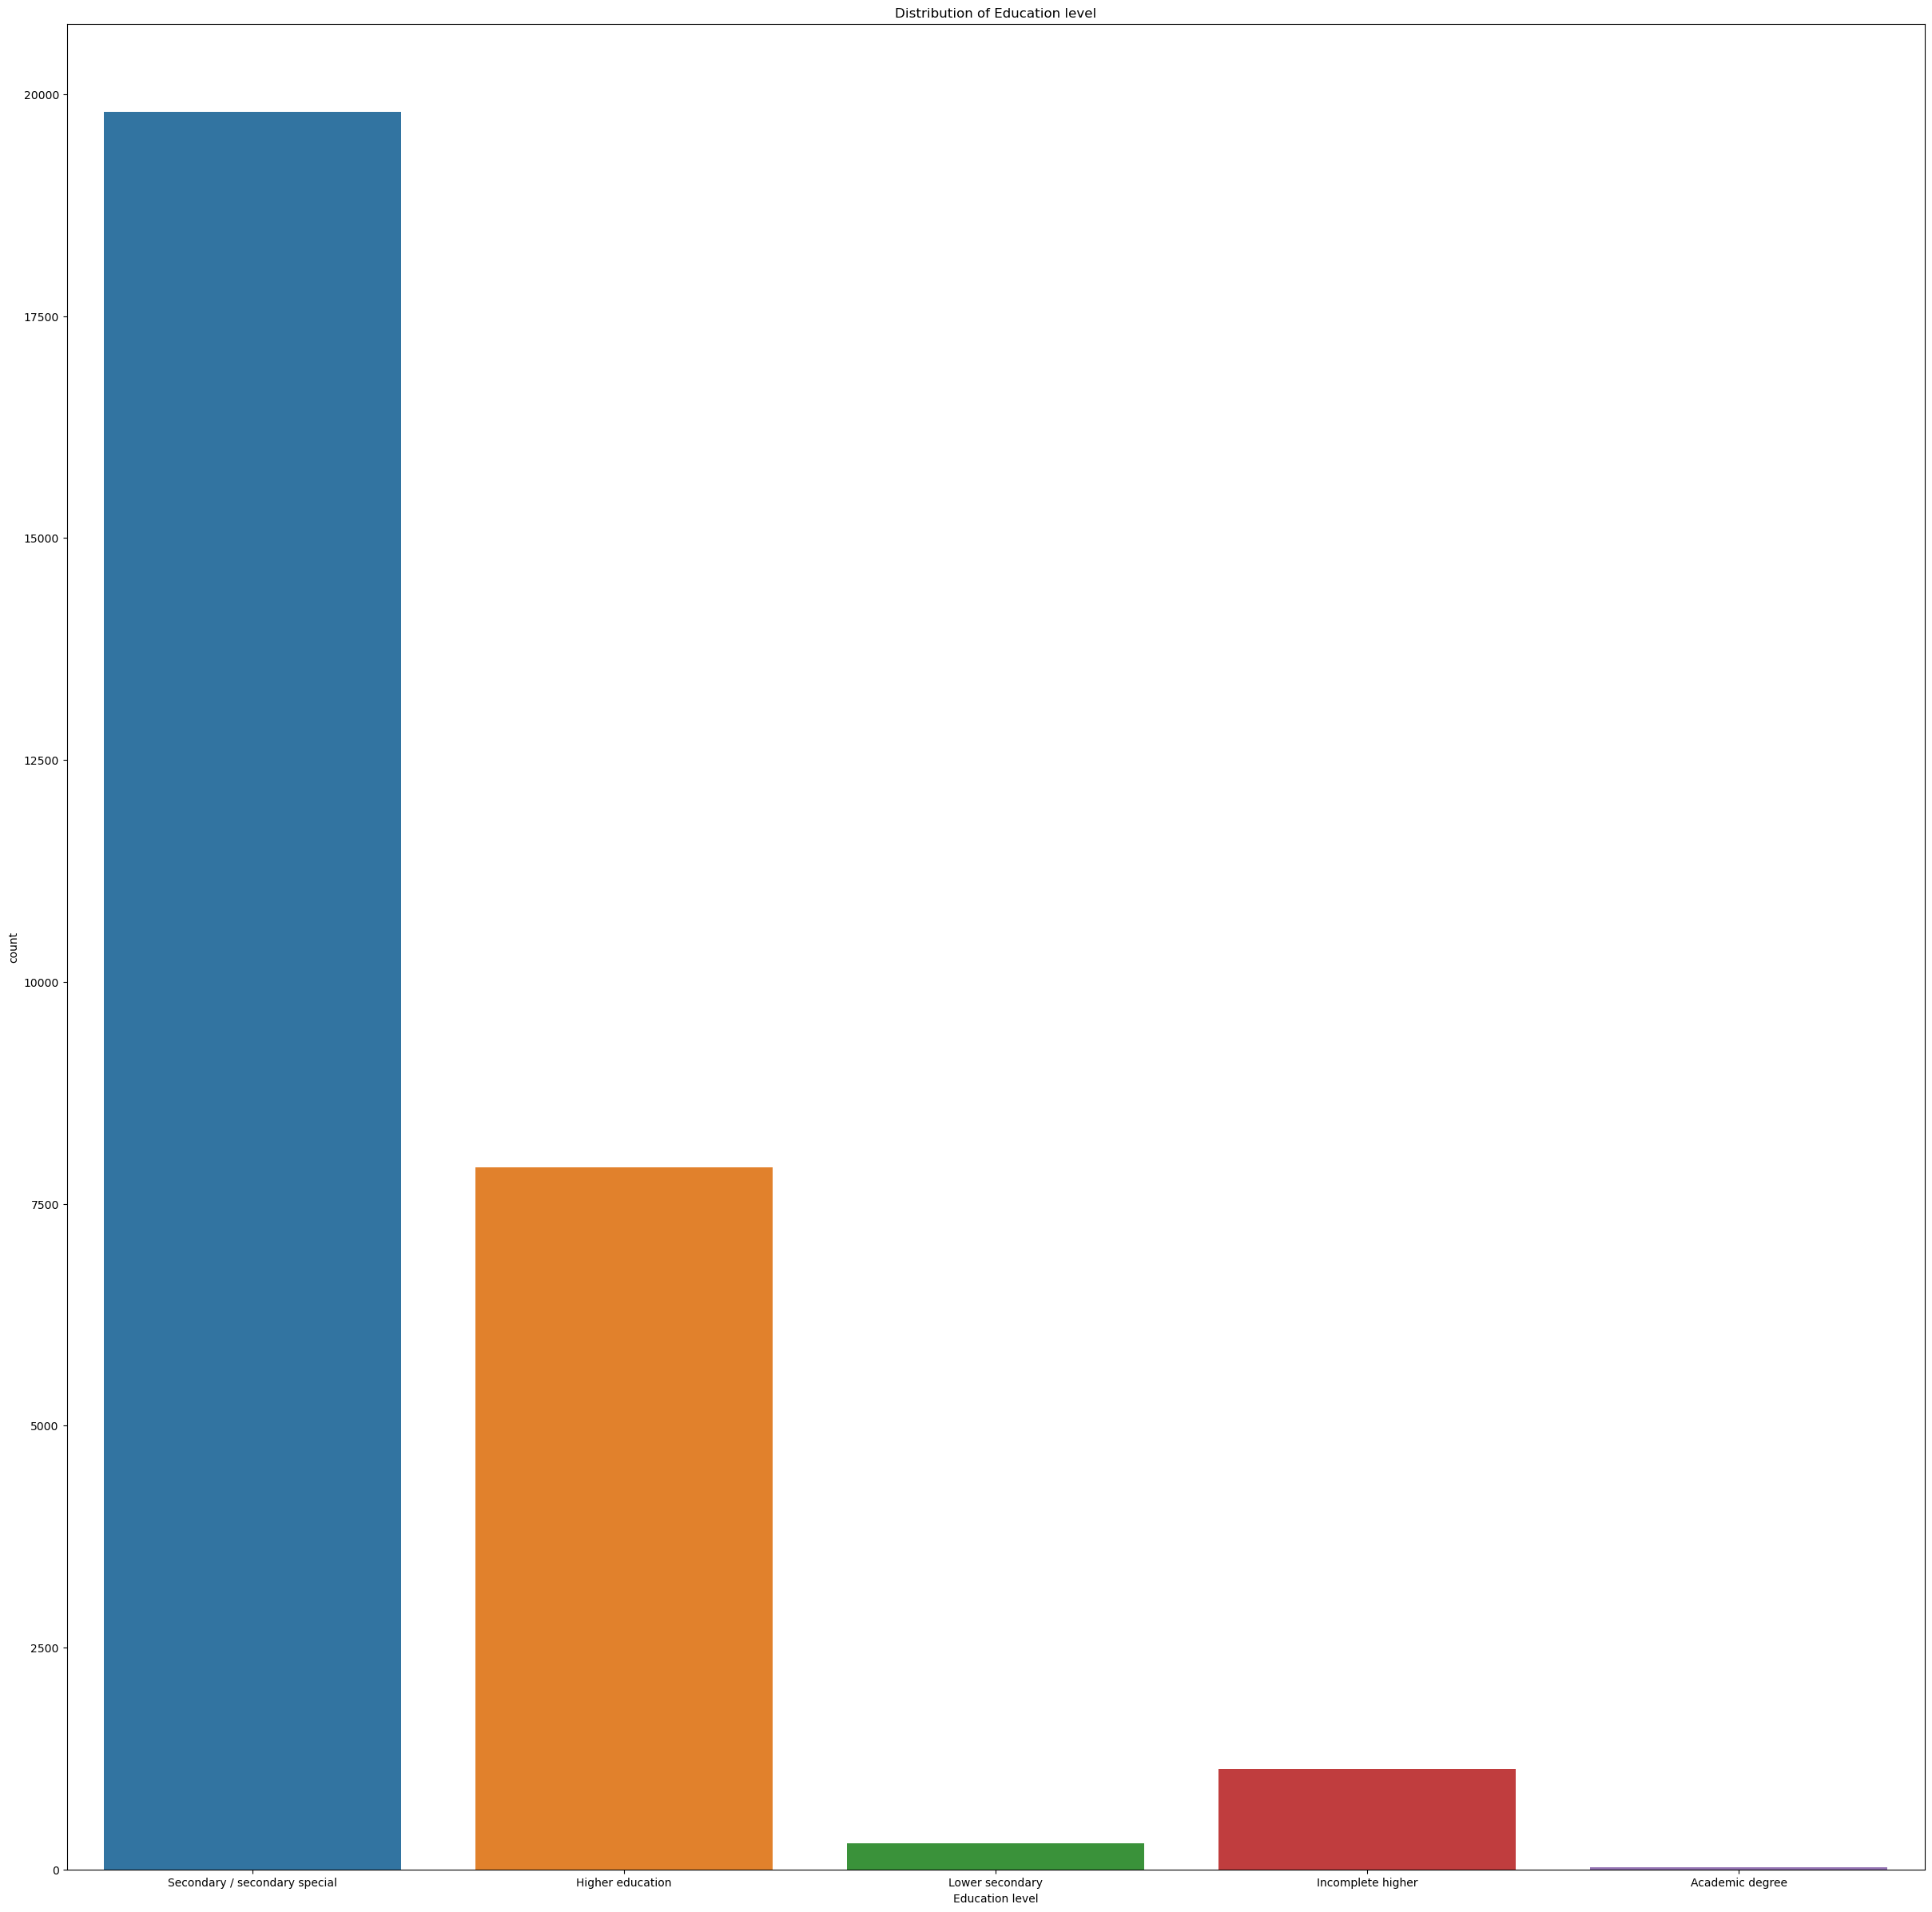

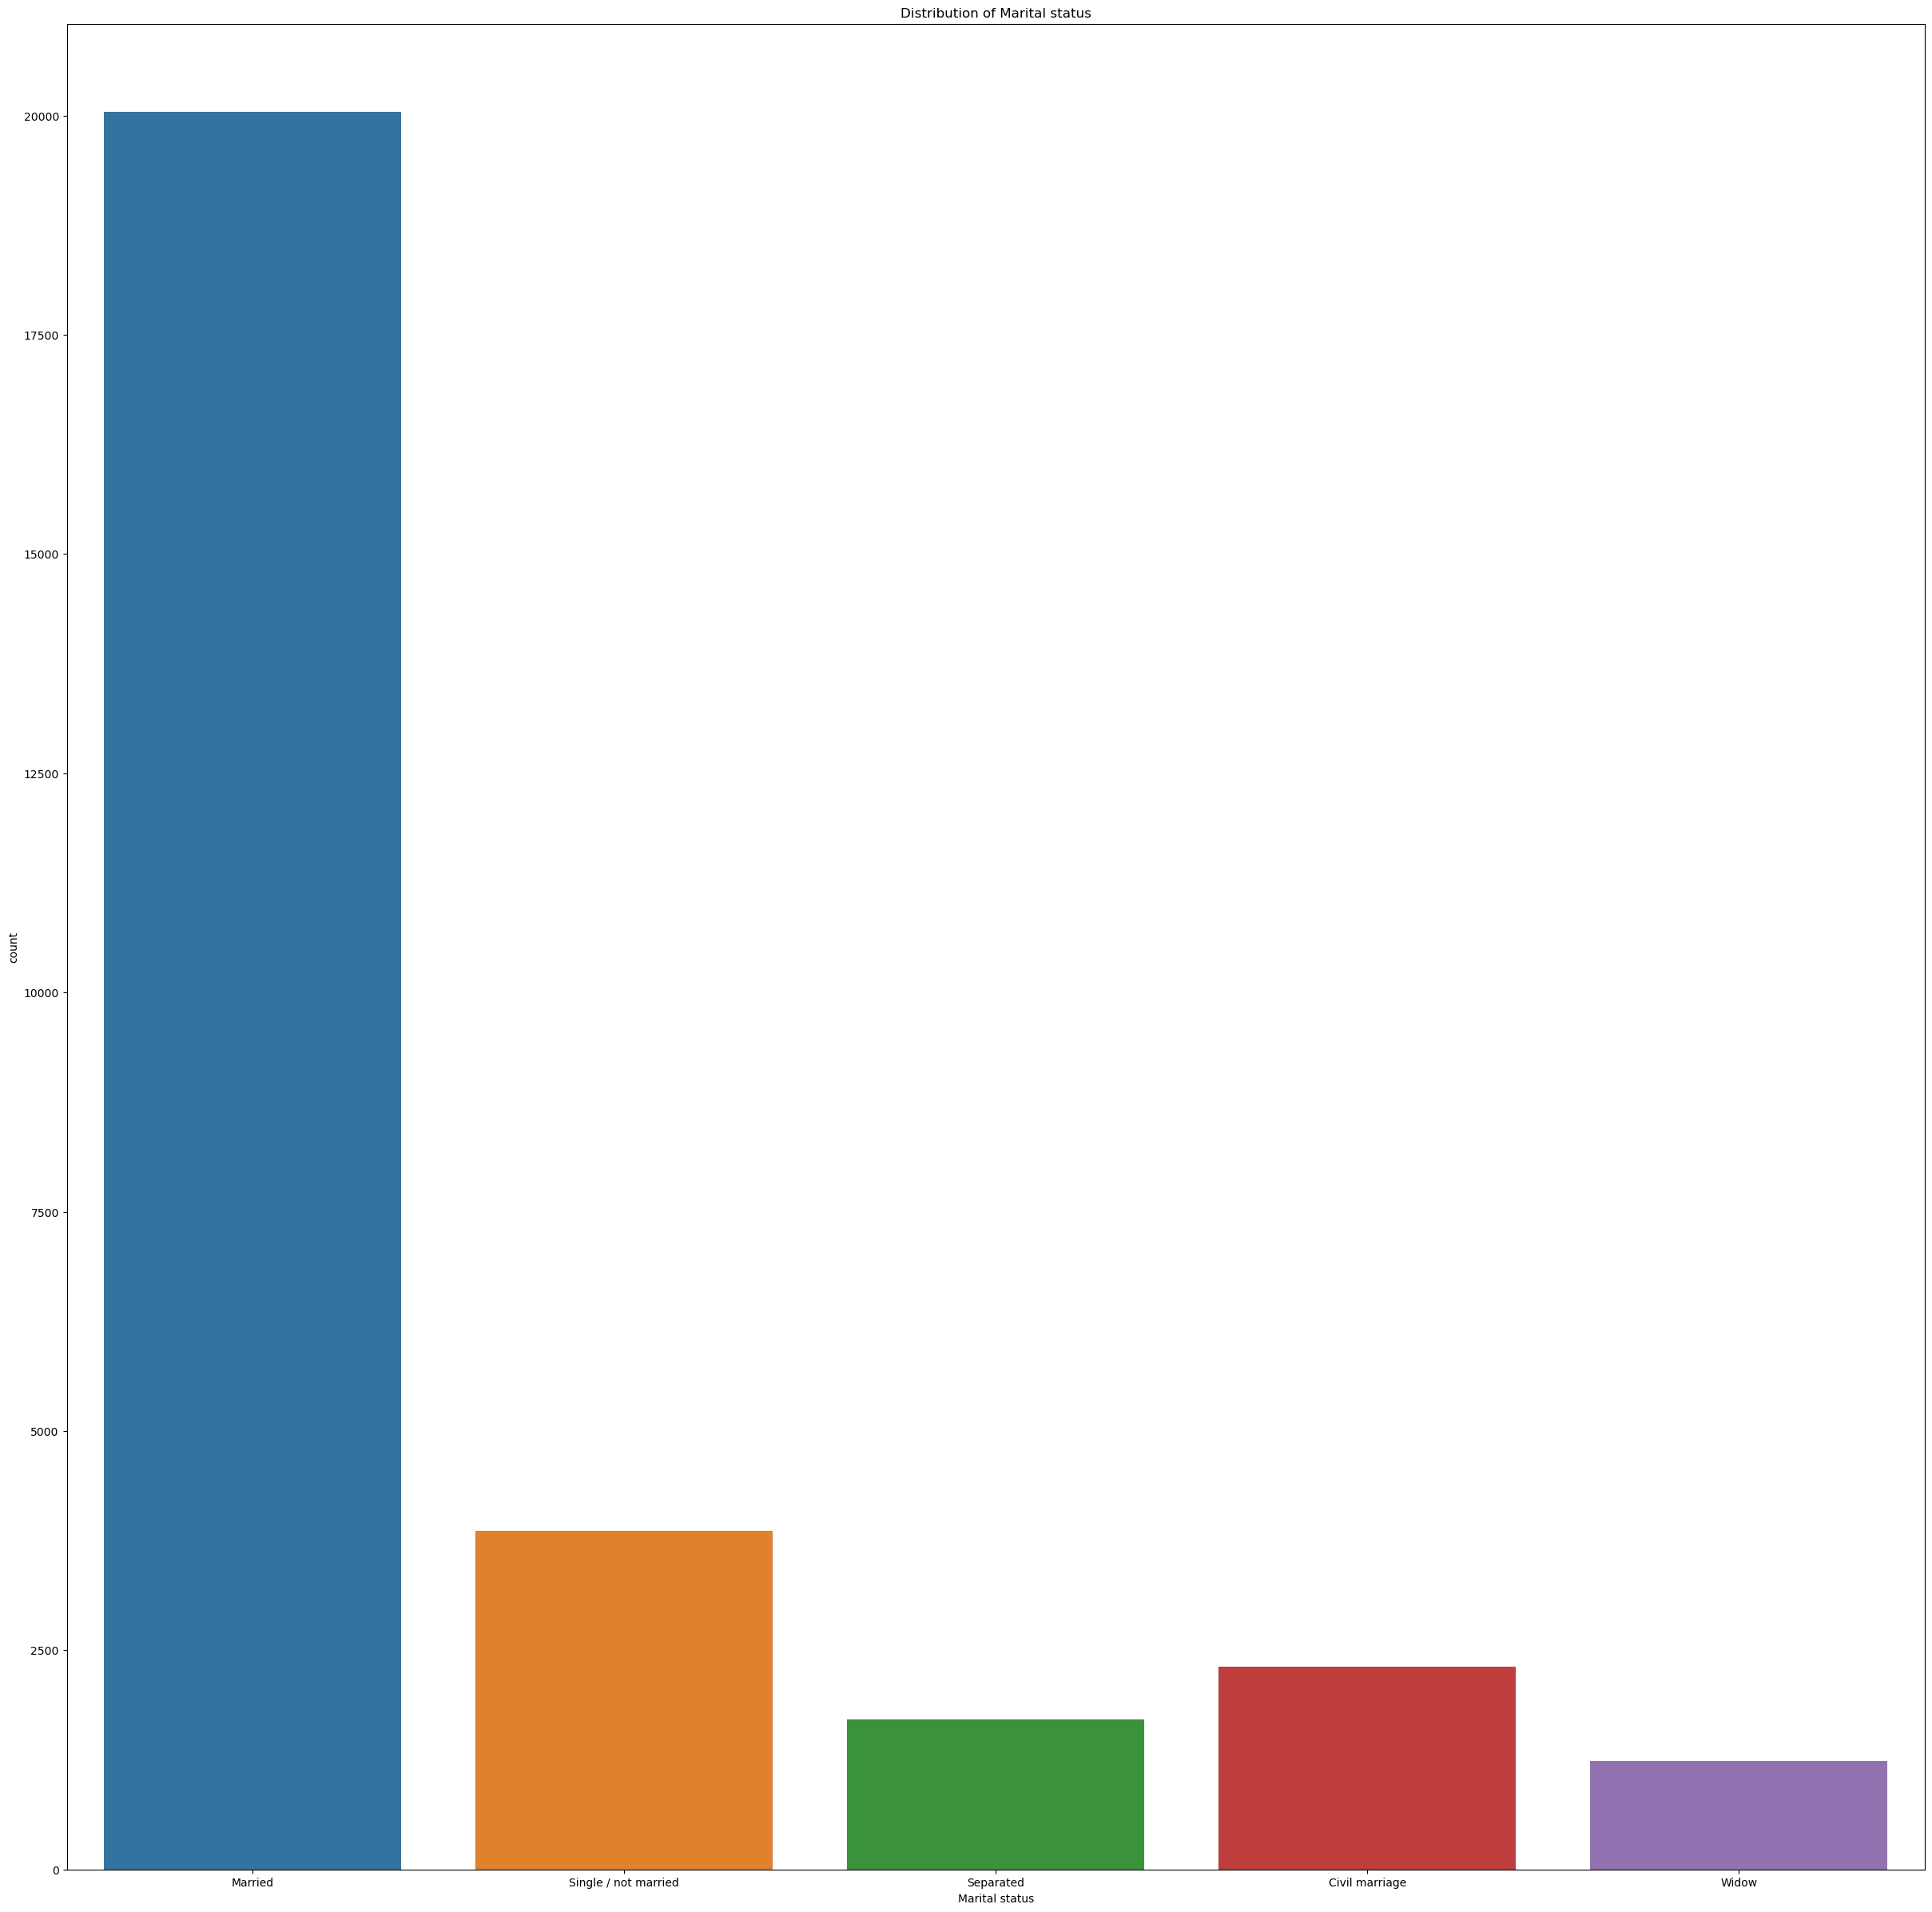

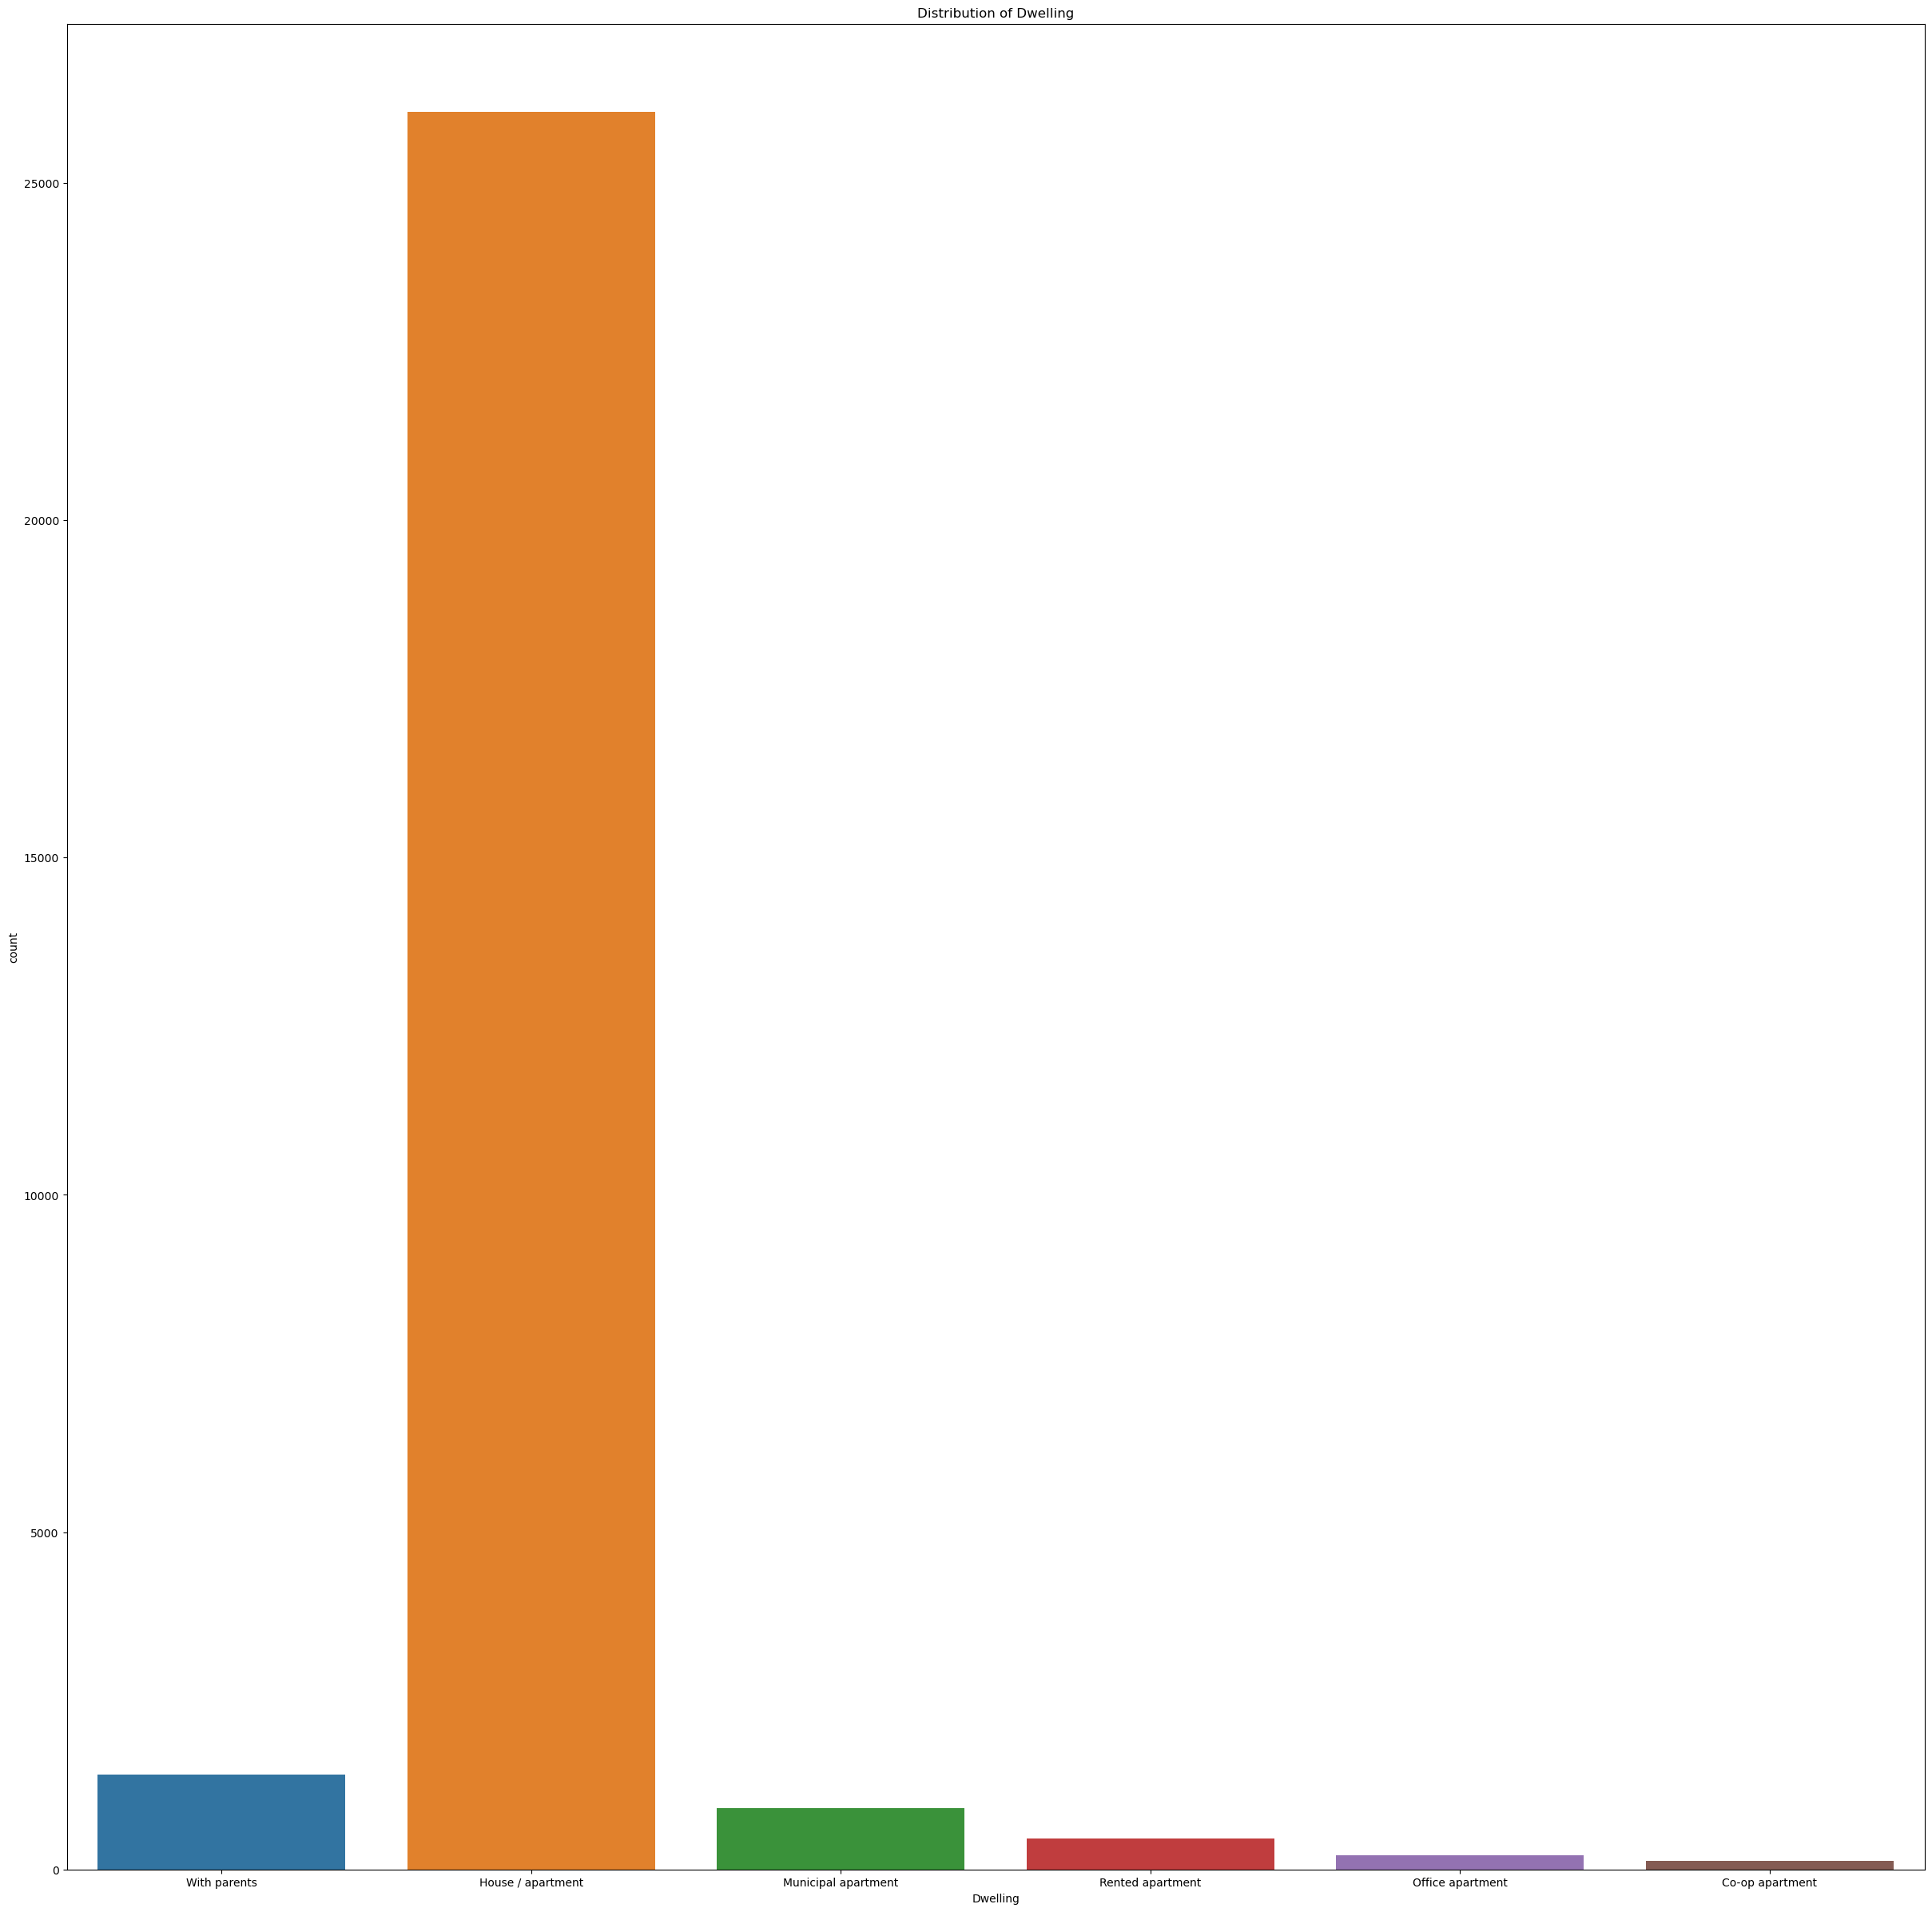

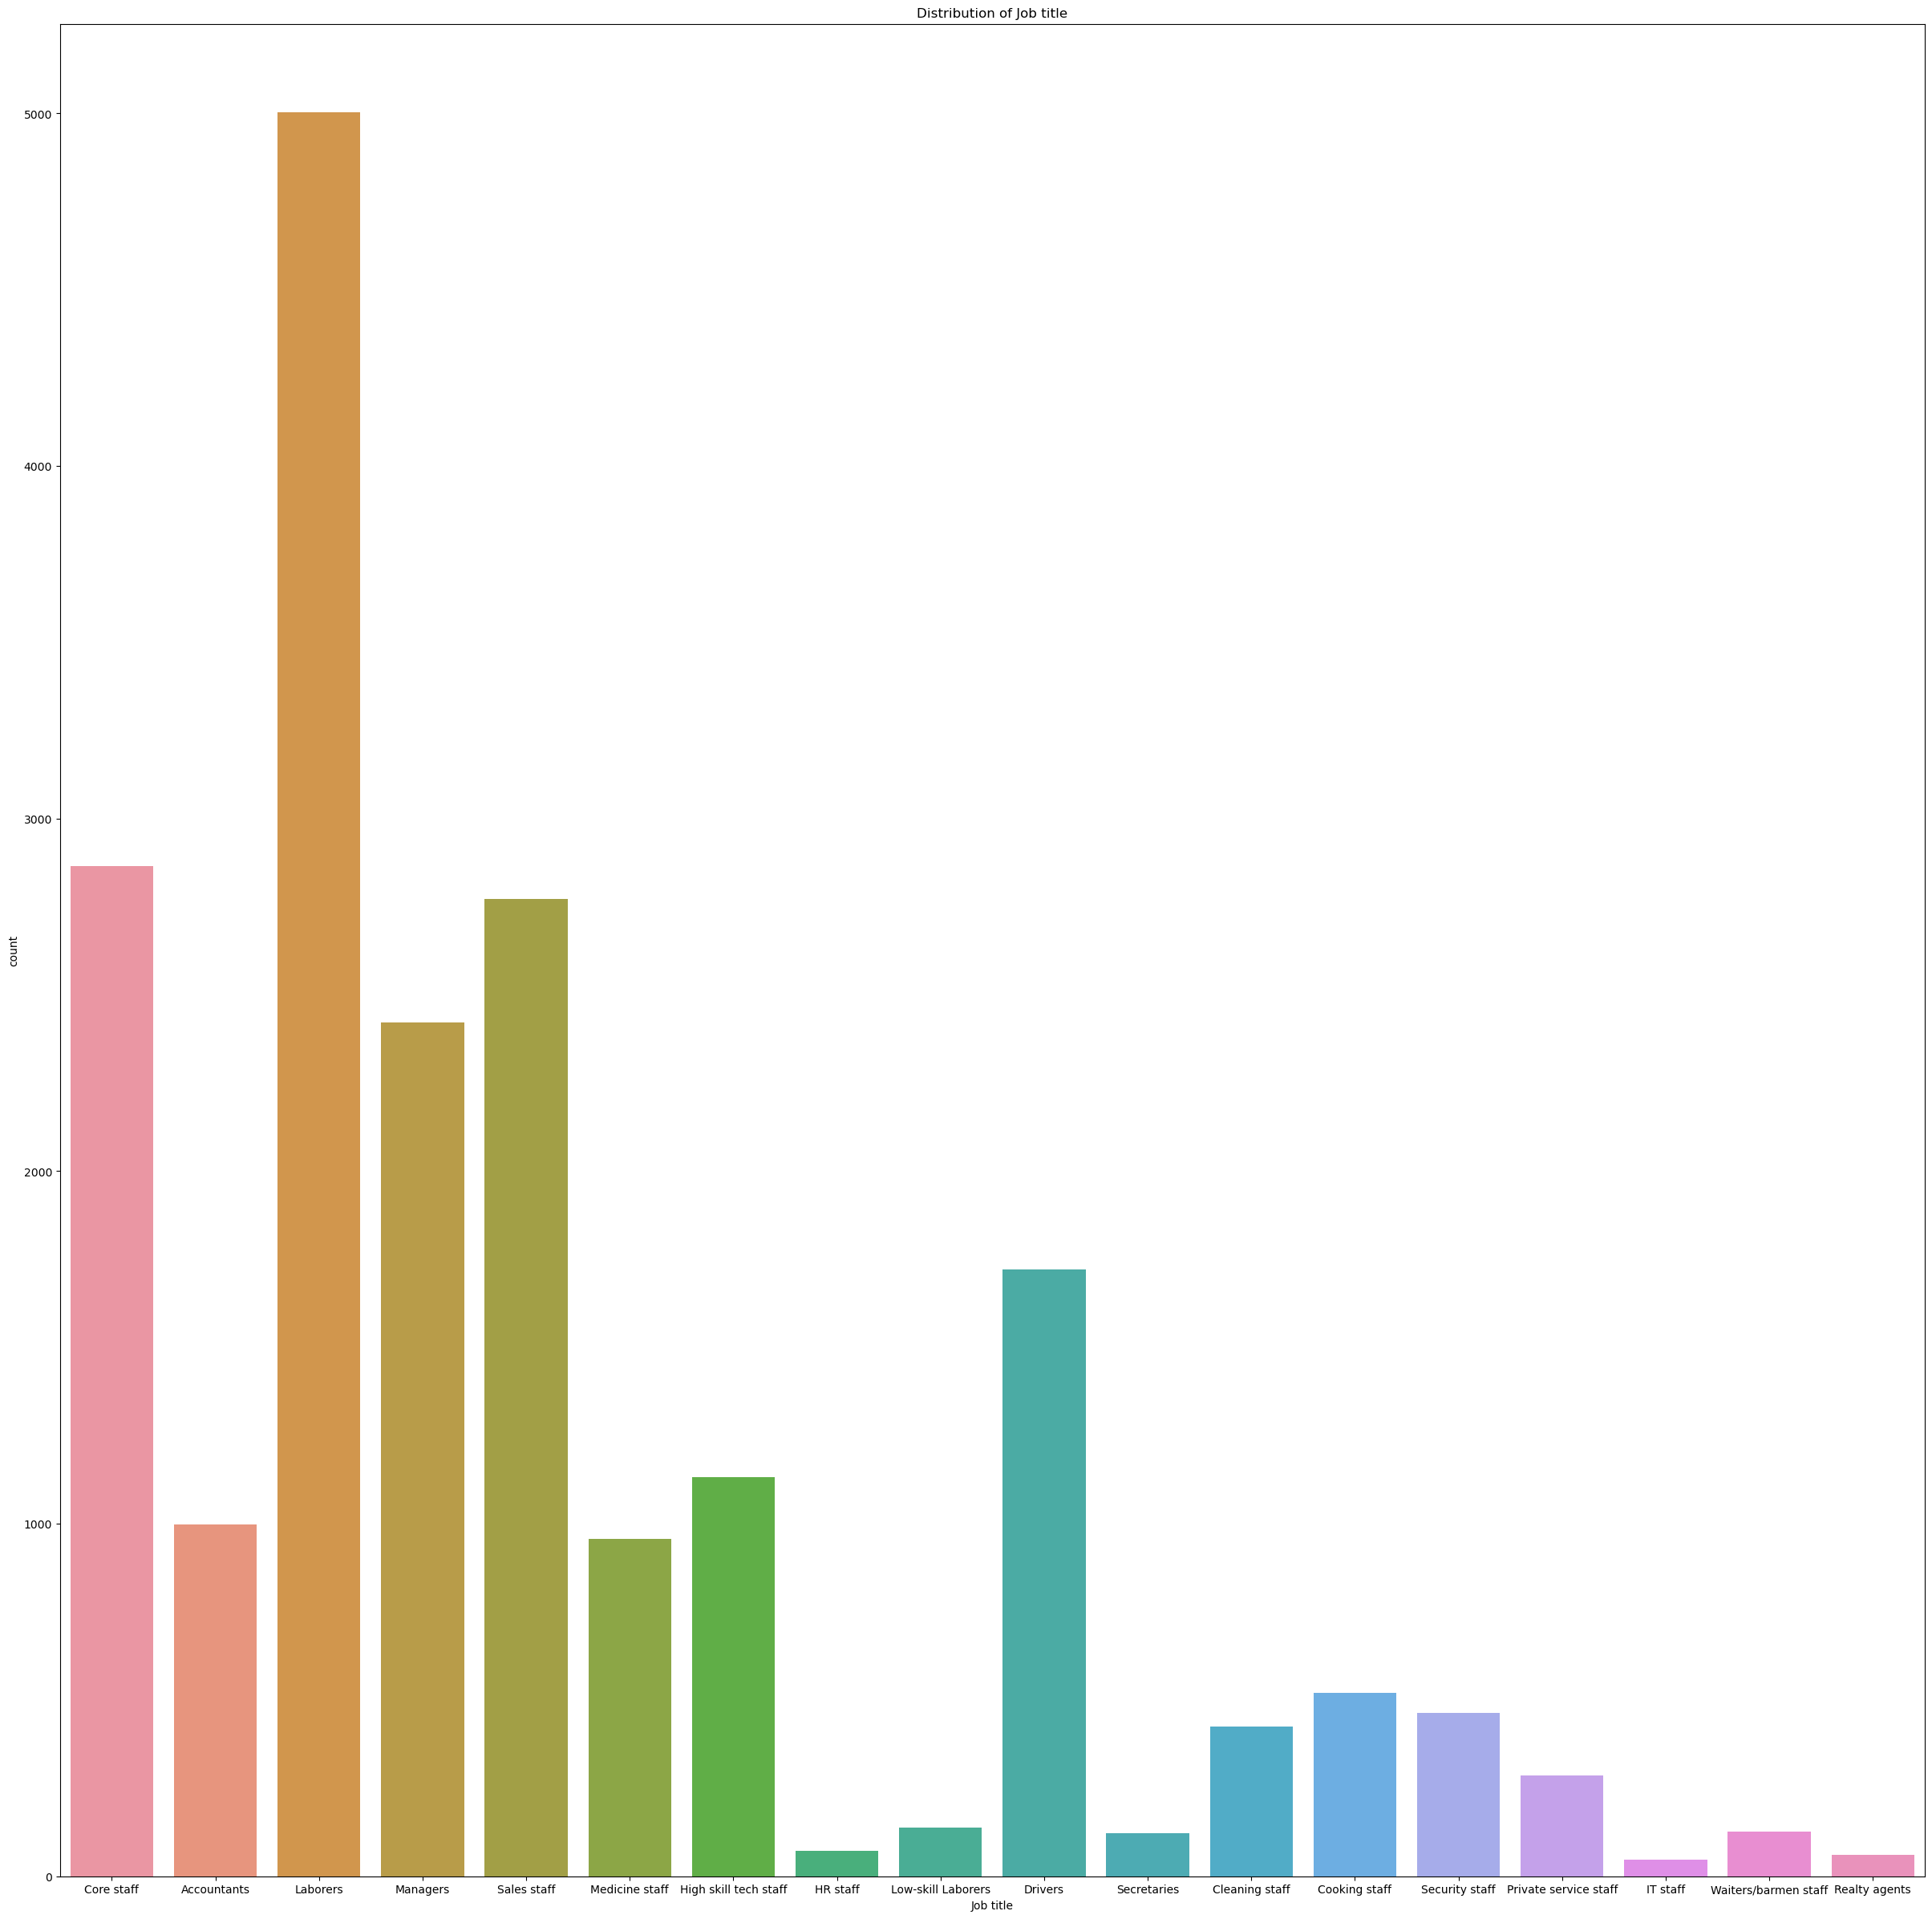

In [10]:
for feature in categorical_features:
    plt.figure(figsize=(30,30))
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")
    plt.show()

# 1.EDA: Bivariate Analysis with Target Variable


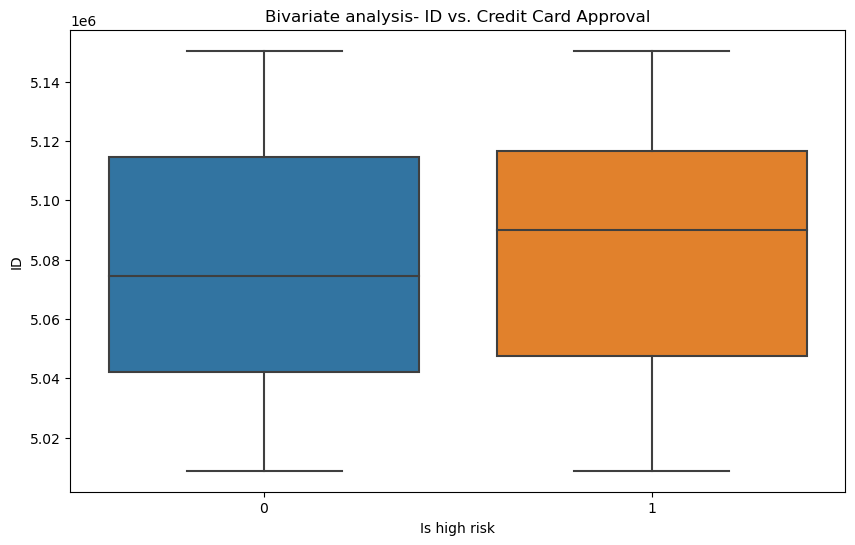

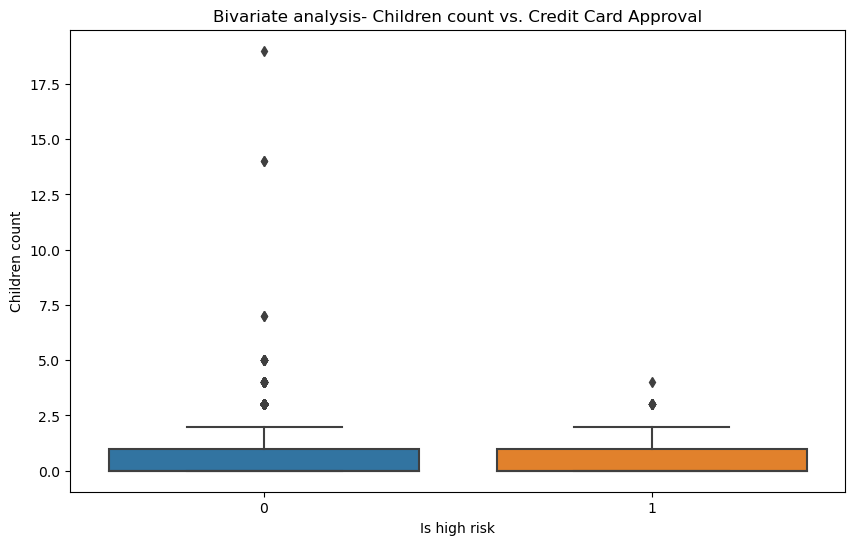

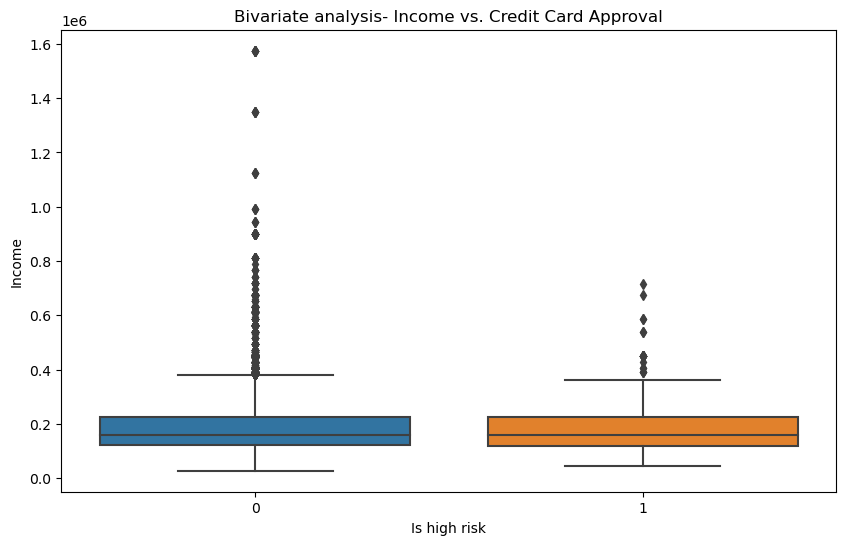

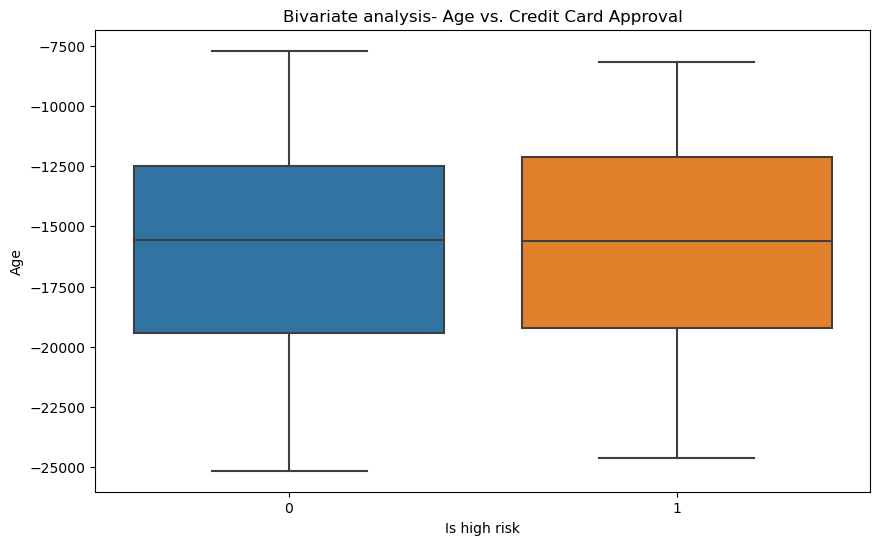

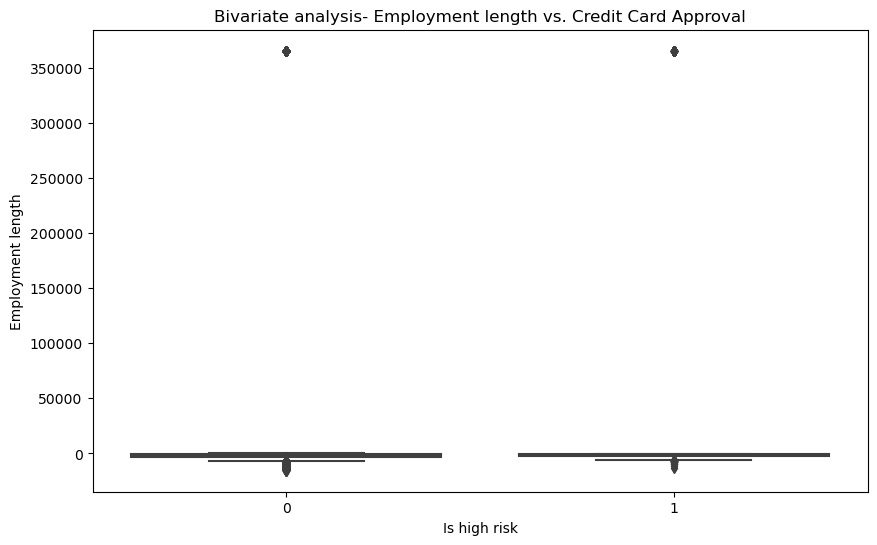

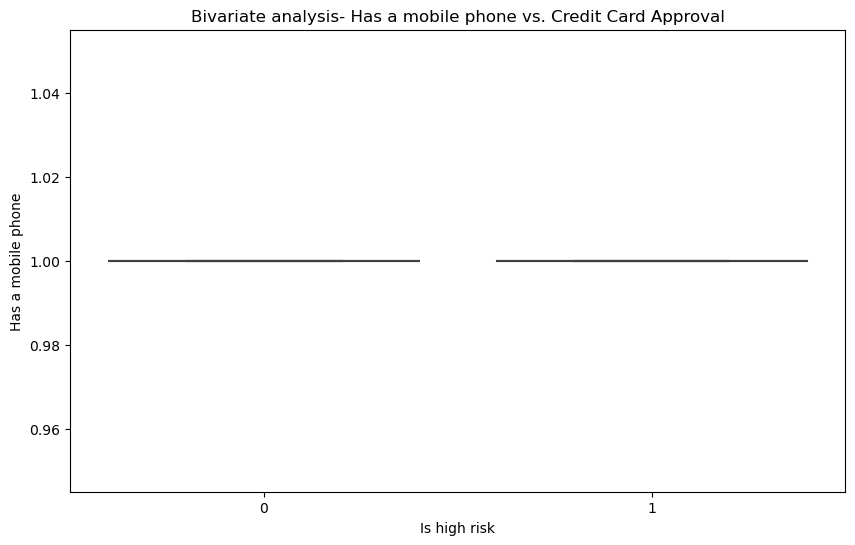

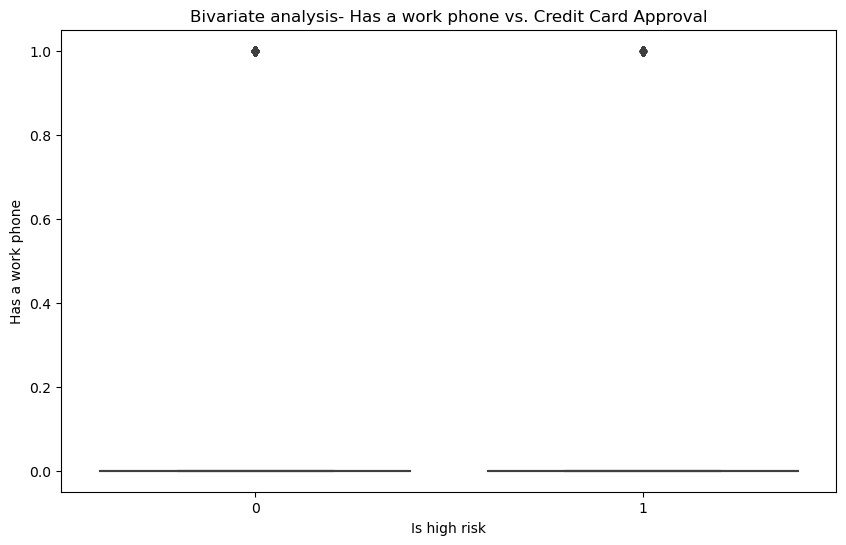

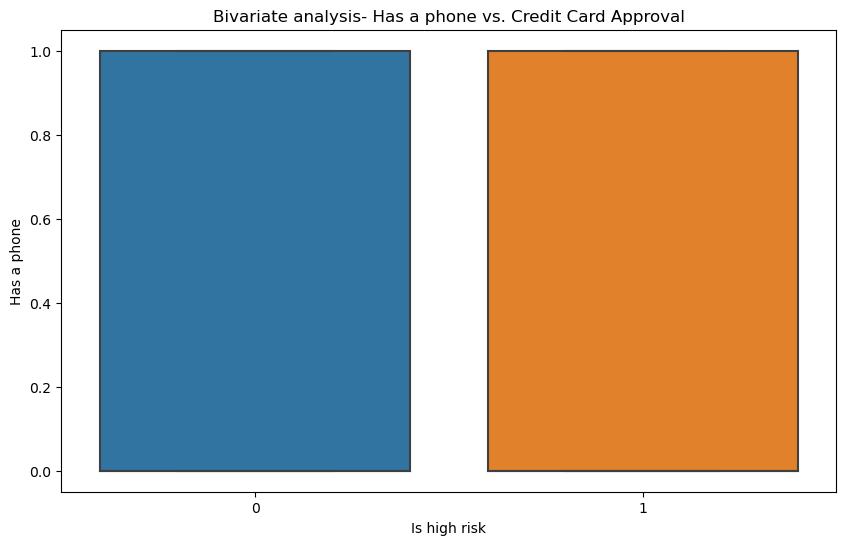

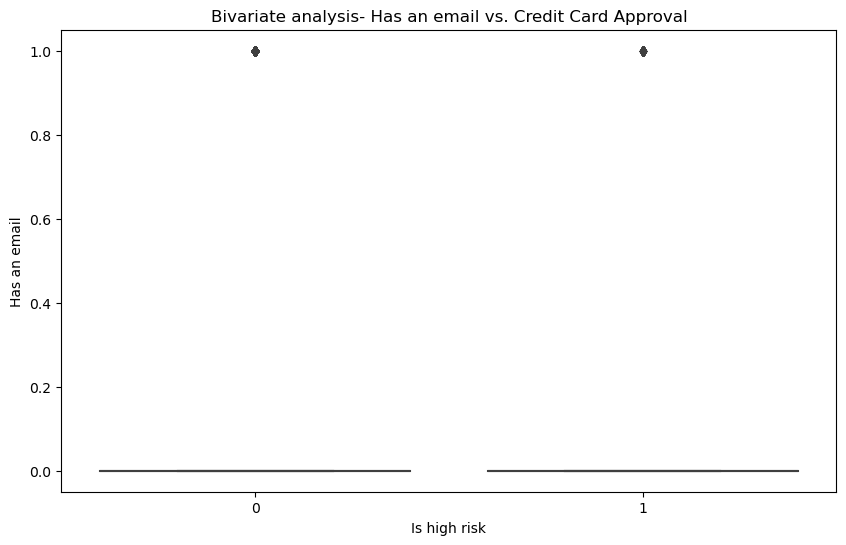

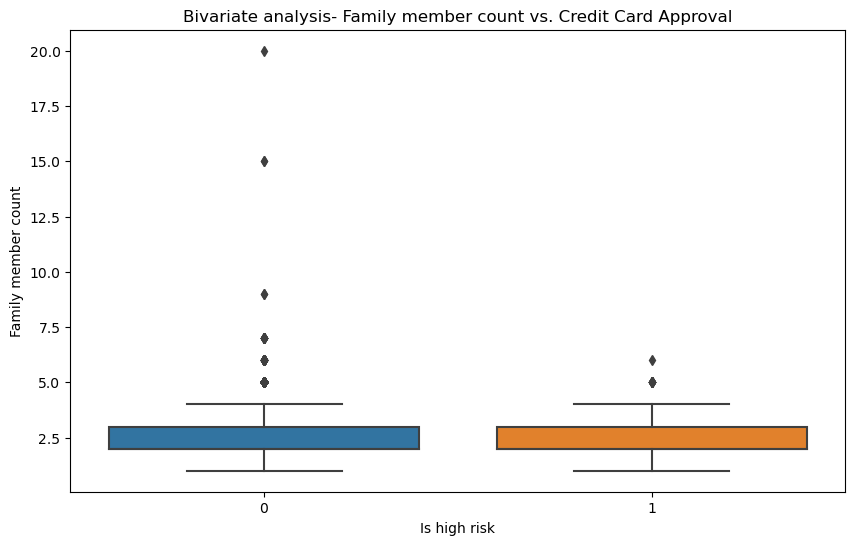

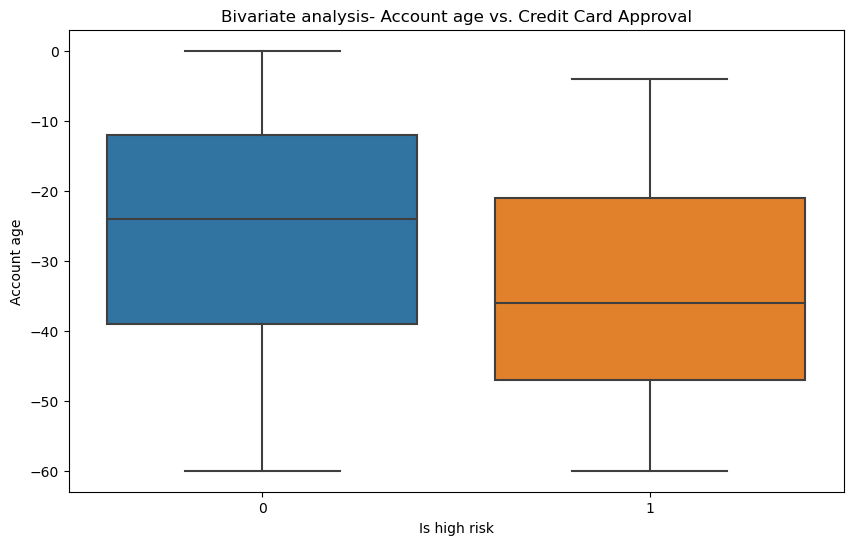

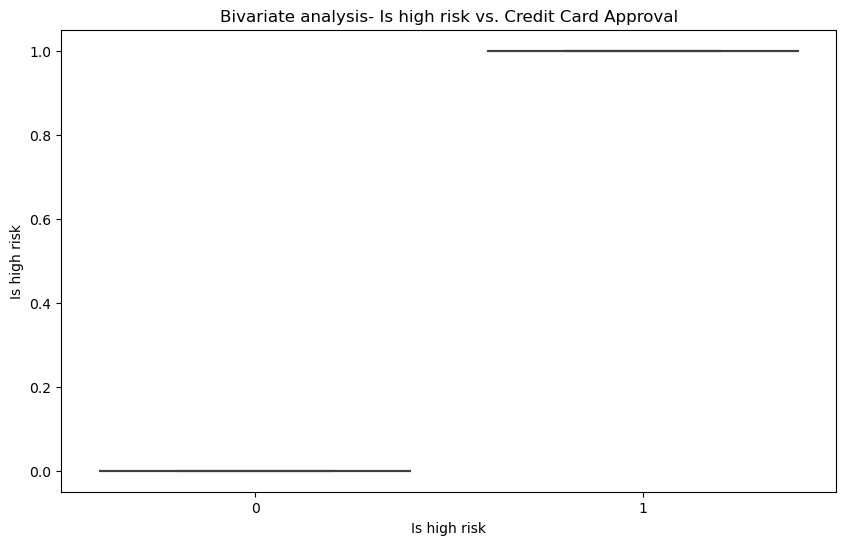

In [11]:
#numeric using box plot.
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Is high risk', y=feature, data=df)
    plt.title(f'Bivariate analysis- {feature} vs. Credit Card Approval')
    plt.show()

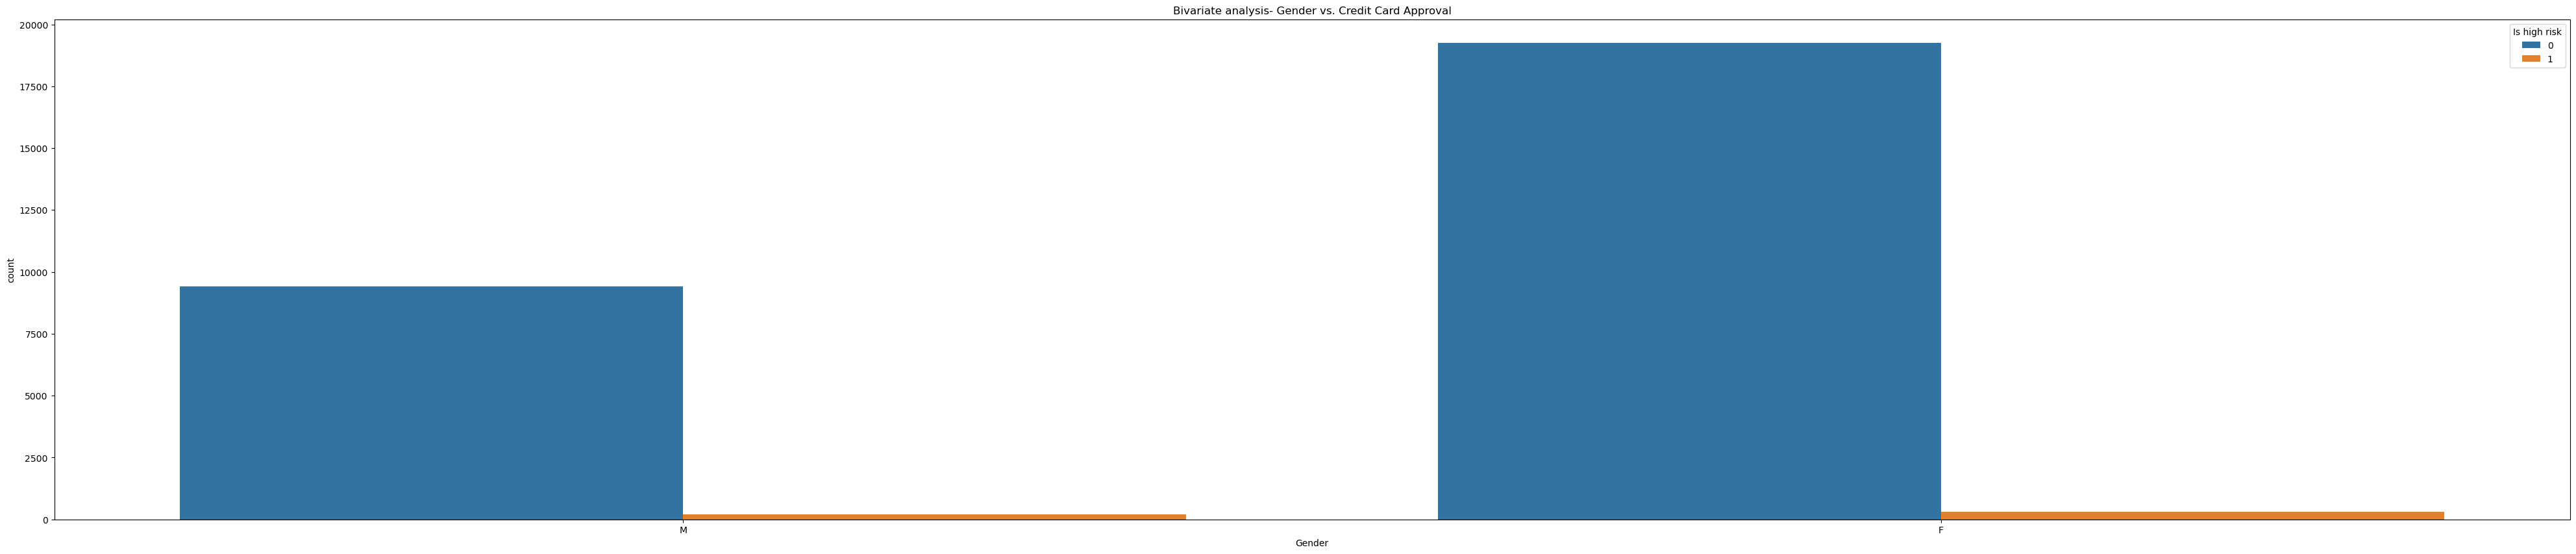

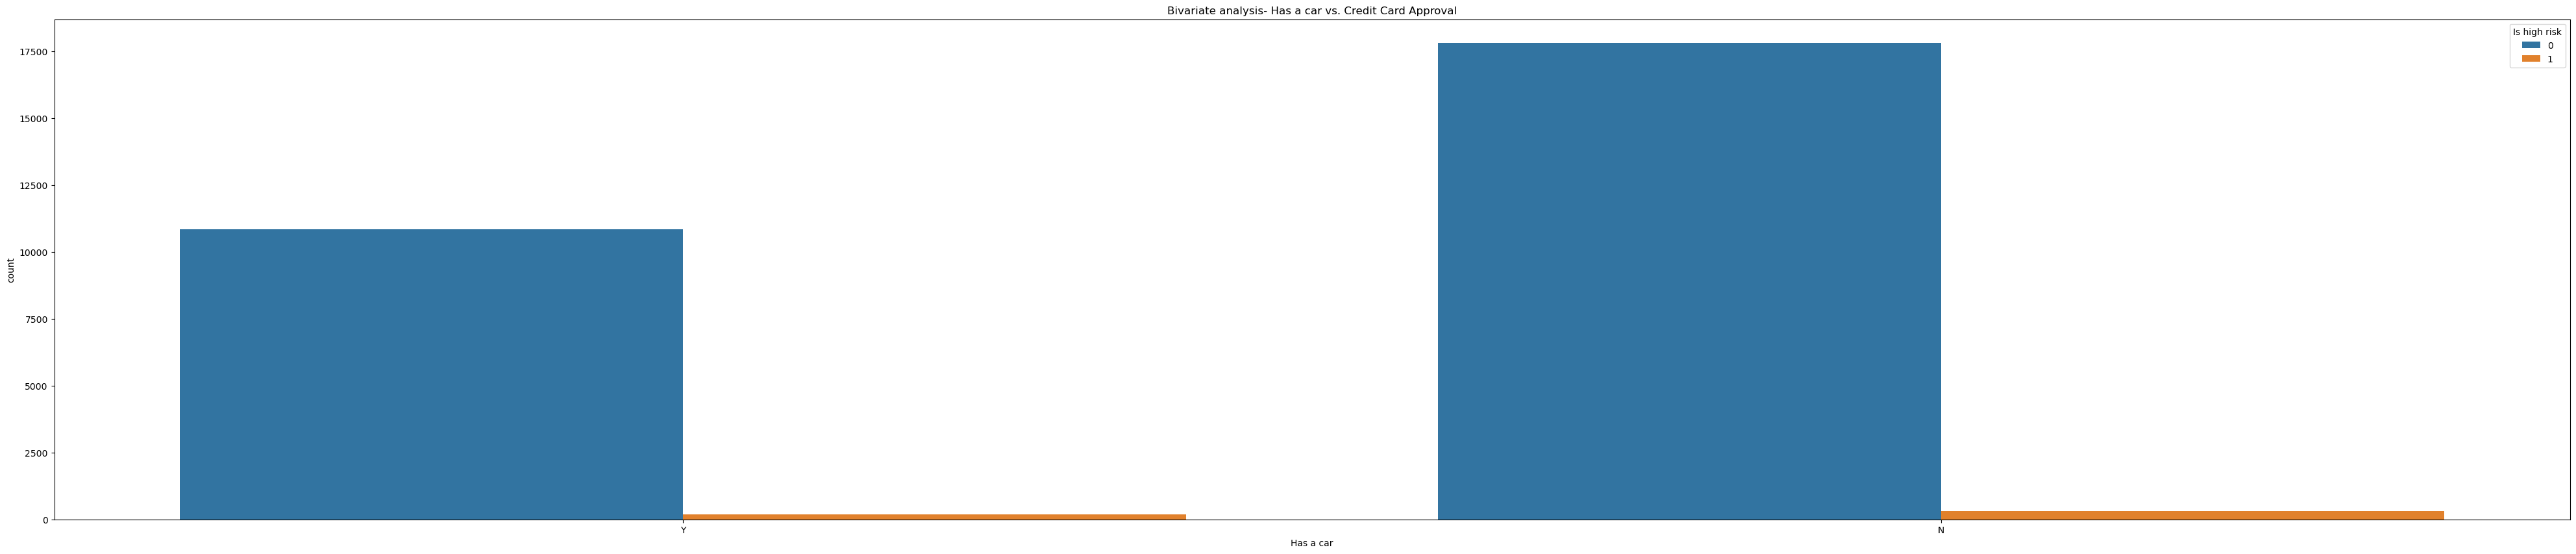

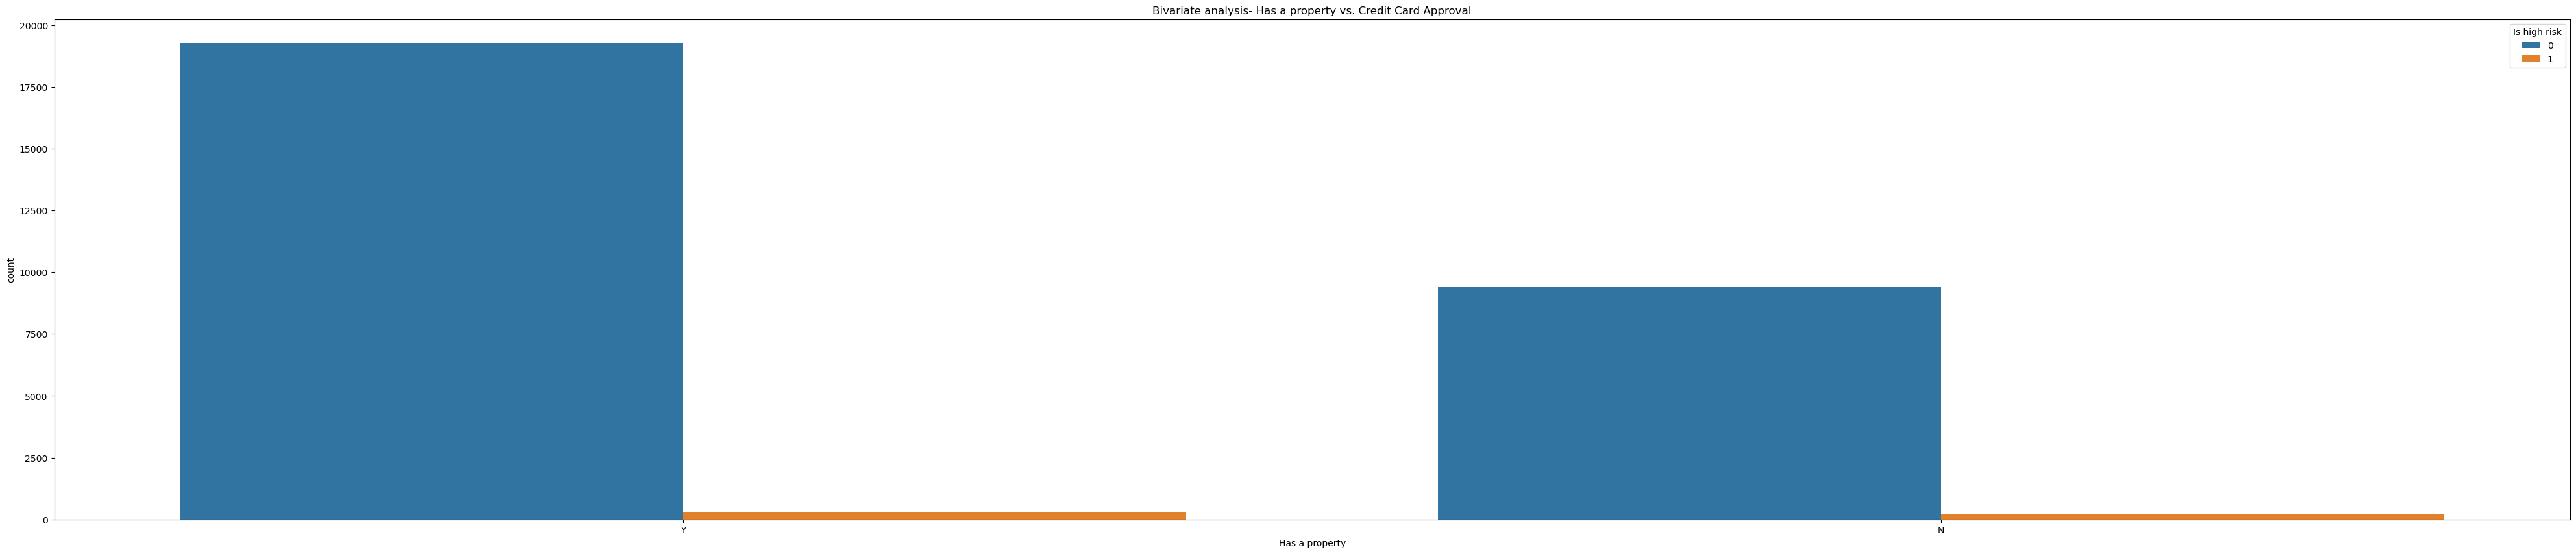

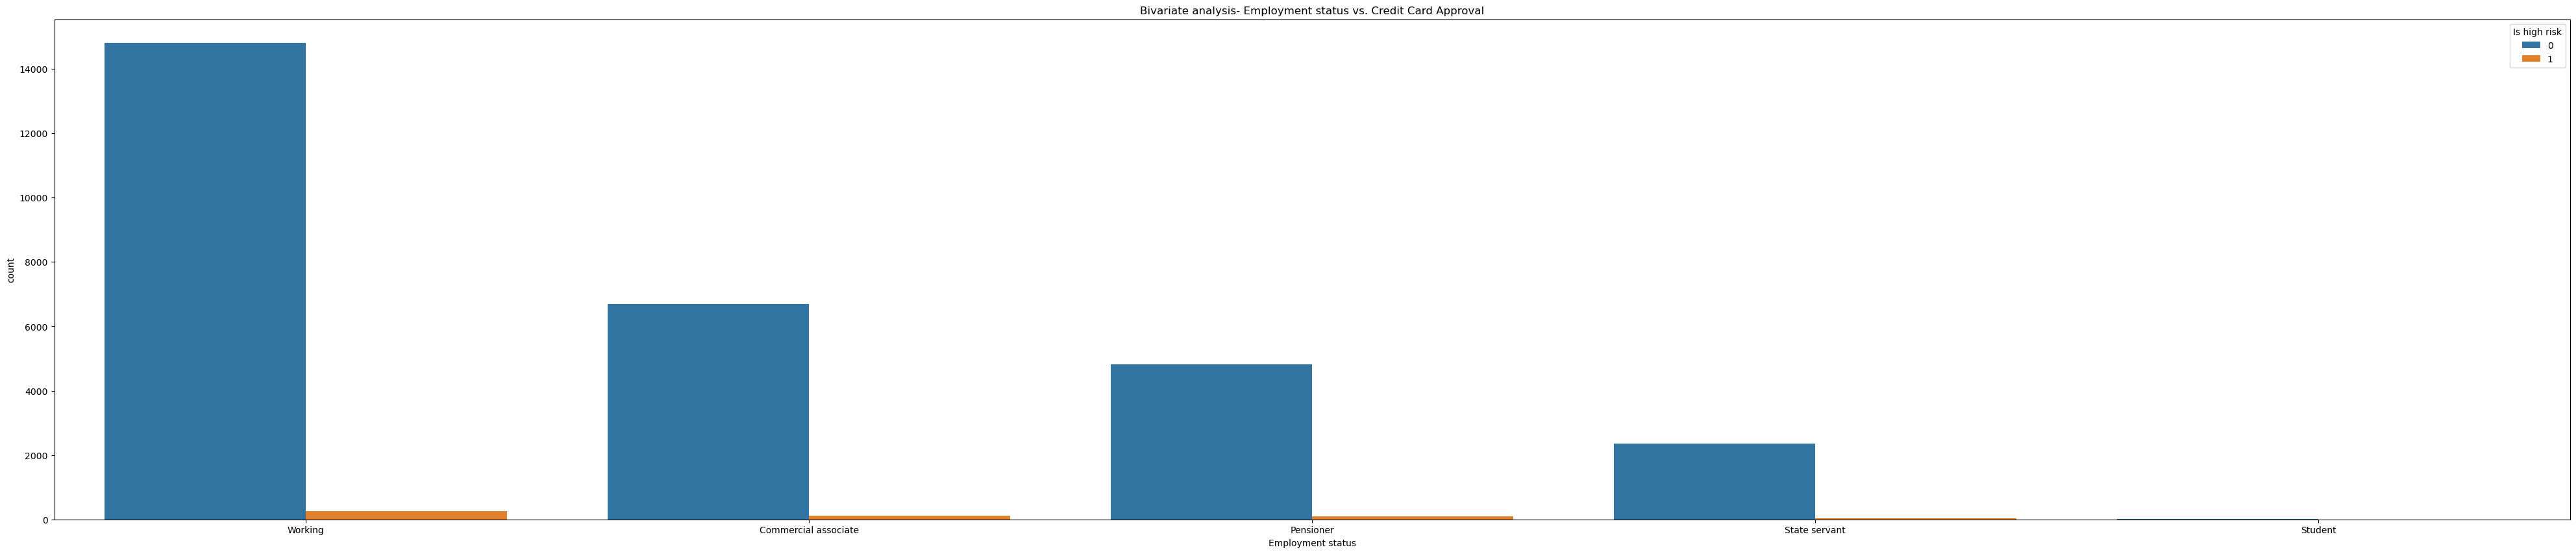

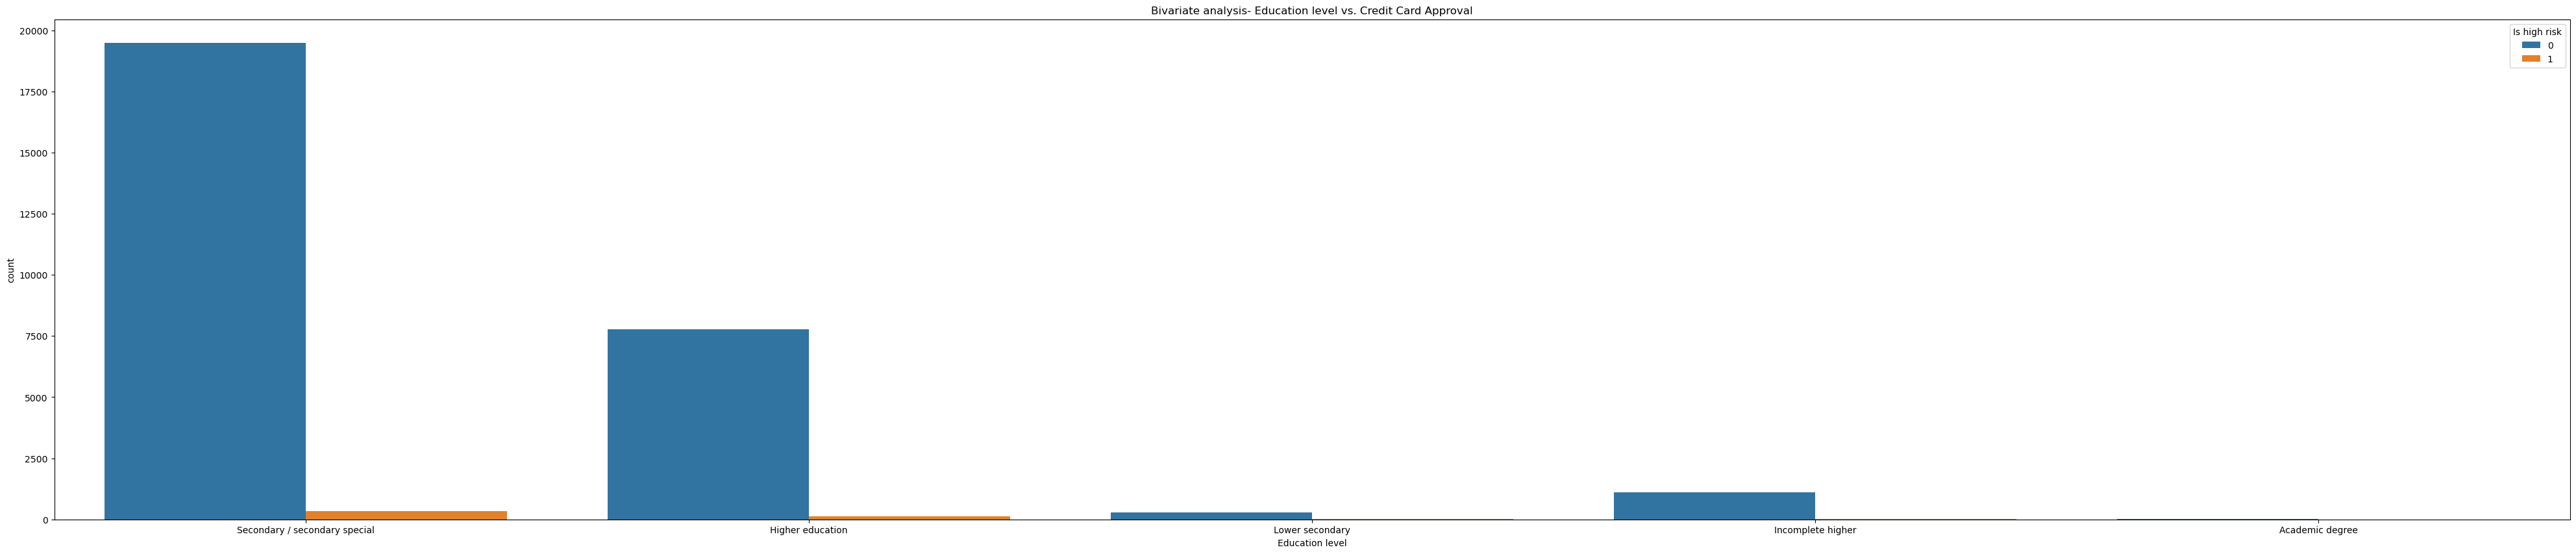

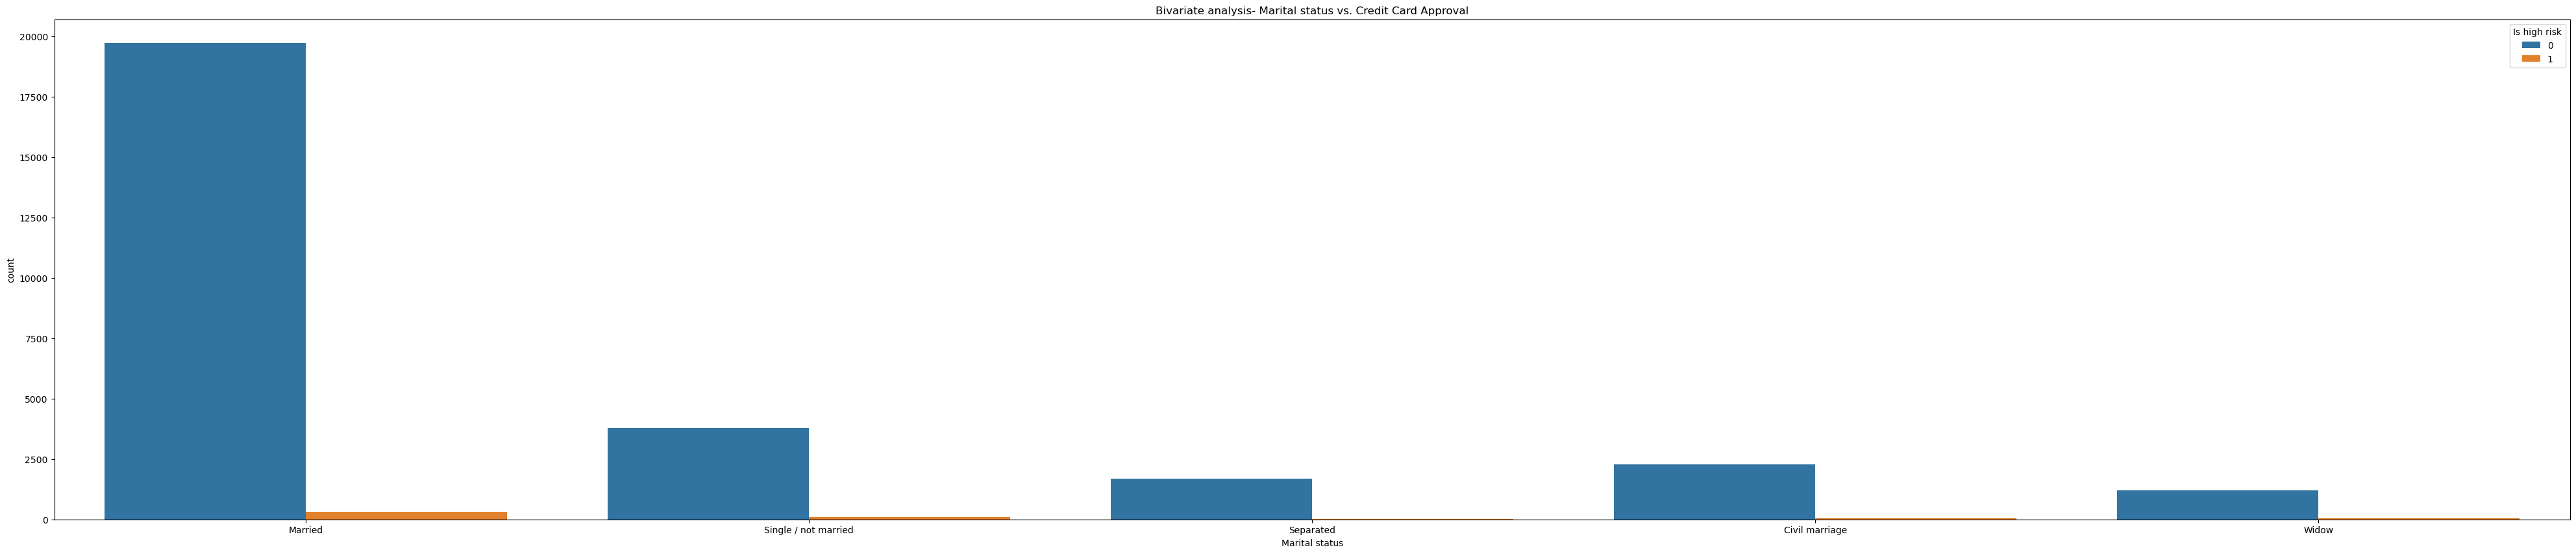

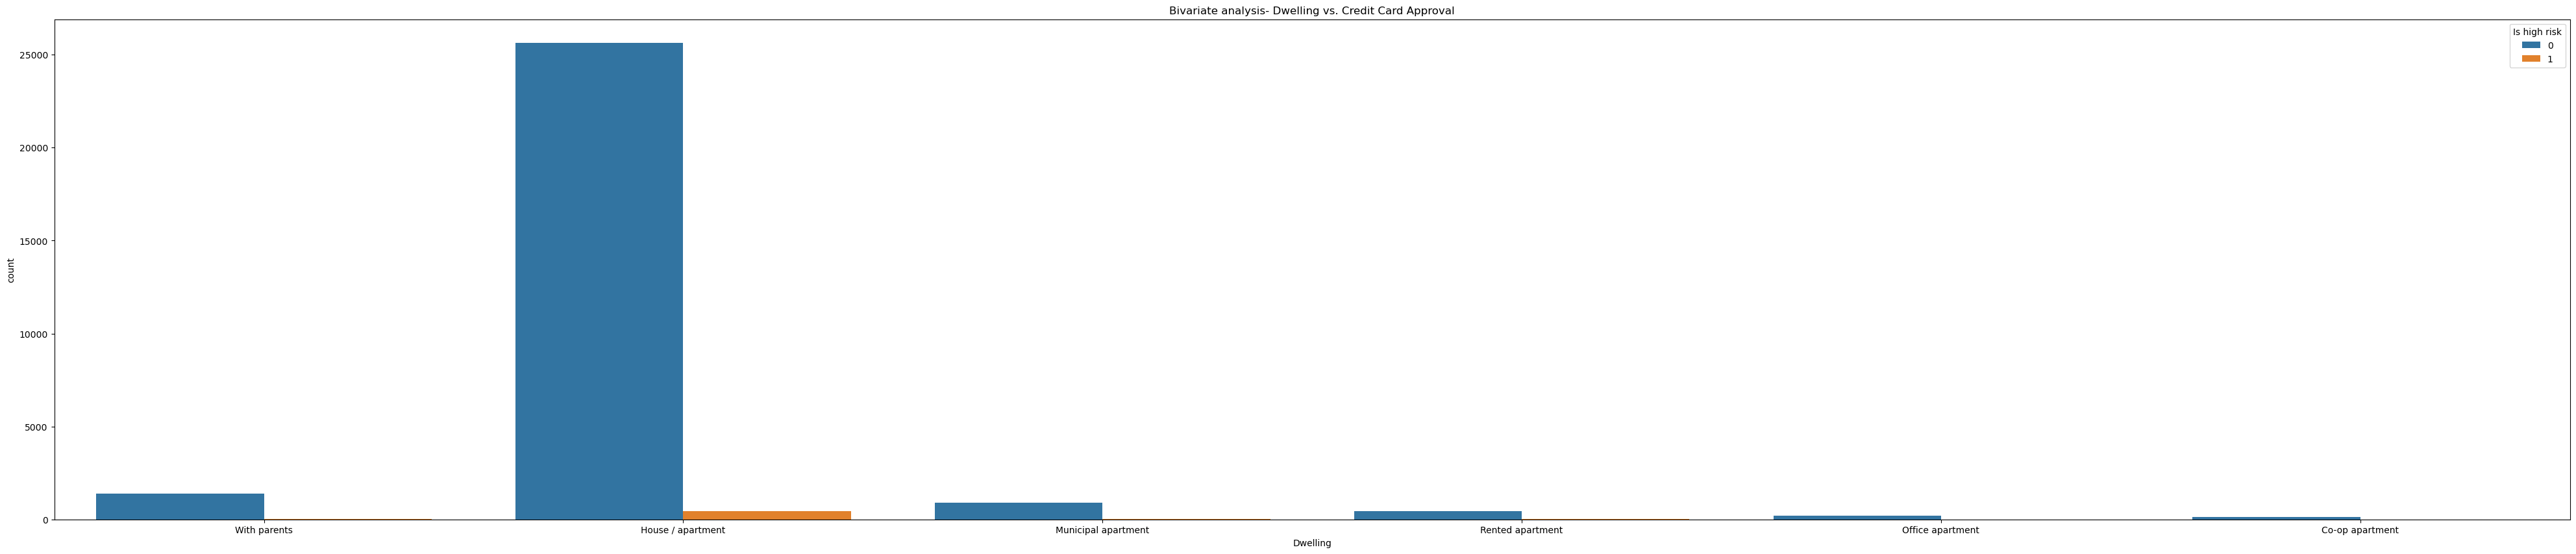

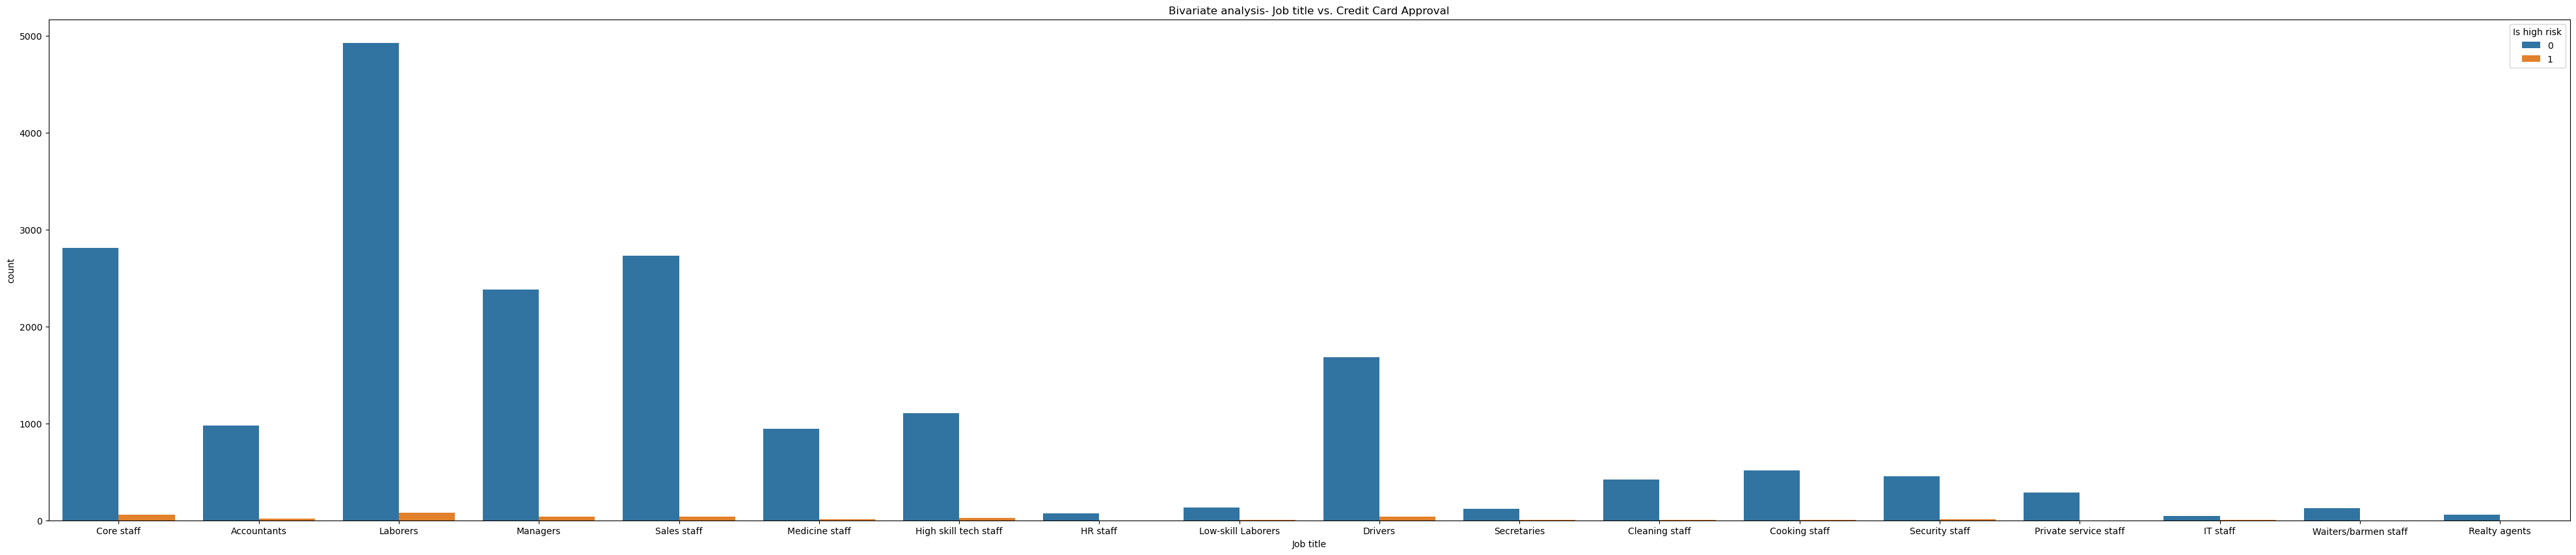

In [12]:
#categorical using box plot.
for feature in categorical_features:
    plt.figure(figsize=(50, 10))
    sns.countplot(x= feature, hue='Is high risk', data=df)
    plt.title(f'Bivariate analysis- {feature} vs. Credit Card Approval')
    plt.show()

# 1.EDA: Feature Correlation


In [13]:
correlation_matrix= df[numeric_features].corr()
correlation_matrix

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
ID,1.000000,0.026291,-0.016257,0.053120,-0.037380,NaN,0.085670,0.013915,-0.048210,0.024724,-0.001453,0.011941
Children count,0.026291,1.000000,0.034991,0.339080,-0.230468,NaN,0.048727,-0.015110,0.015116,0.888676,-0.003722,0.000369
Income,-0.016257,0.034991,1.000000,0.068156,-0.169940,NaN,-0.036601,0.021516,0.091500,0.025338,-0.016435,-0.001760
Age,0.053120,0.339080,0.068156,1.000000,-0.616299,NaN,0.177483,-0.027621,0.104728,0.301941,0.057467,0.002422
Employment length,-0.037380,-0.230468,-0.169940,-0.616299,1.000000,NaN,-0.242055,-0.012511,-0.085673,-0.220102,0.005643,0.005398
Has a mobile phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has a work phone,0.085670,0.048727,-0.036601,0.177483,-0.242055,NaN,1.000000,0.312419,-0.035741,0.065130,-0.009882,0.005115
Has a phone,0.013915,-0.015110,0.021516,-0.027621,-0.012511,NaN,0.312419,1.000000,0.011367,-0.002008,-0.013896,-0.000112
Has an email,-0.048210,0.015116,0.091500,0.104728,-0.085673,NaN,-0.035741,0.011367,1.000000,0.013759,0.002588,-0.004659
Family member count,0.024724,0.888676,0.025338,0.301941,-0.220102,NaN,0.065130,-0.002008,0.013759,1.000000,-0.021693,-0.006252


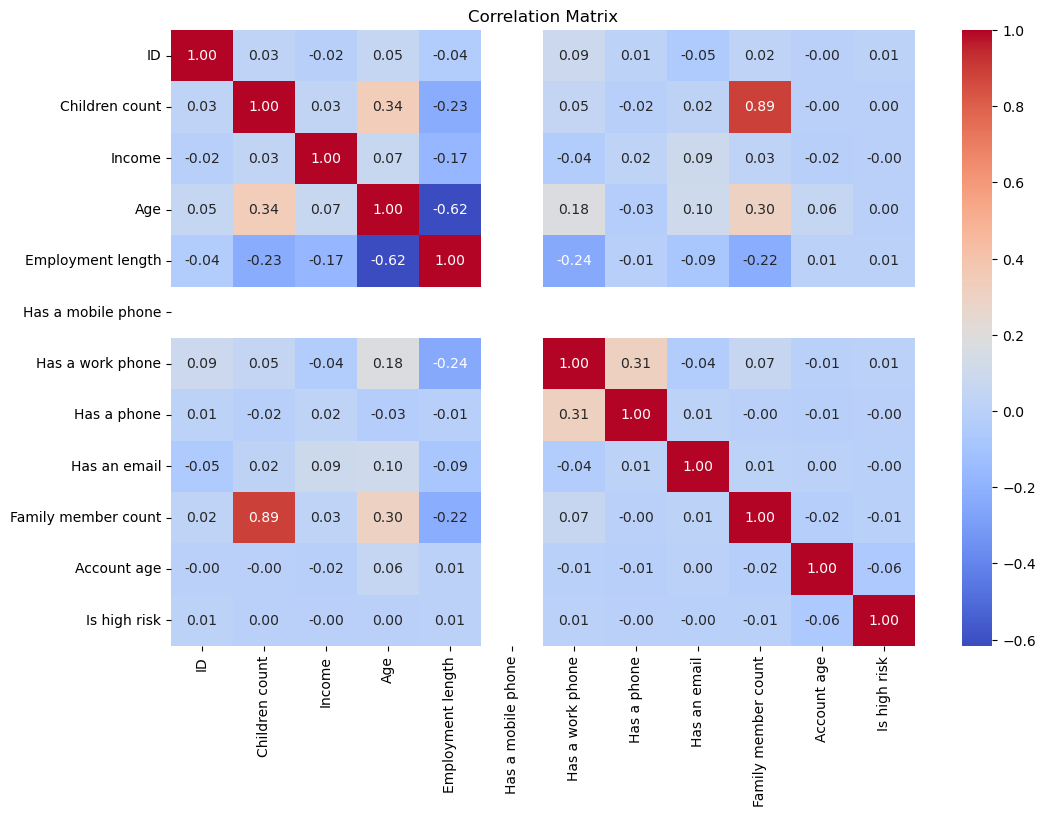

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 2. Feature Engineering

In [15]:
# Handling Time-Related Features
df['Account_age_Year'] = pd.to_datetime(df['Account age']).dt.year
df['Account_age_Month'] = pd.to_datetime(df['Account age']).dt.month


 # 3. Data Preprocessing

In [16]:
age_values= df['Age'].value_counts()
age_values

-12676    44
-15519    44
-16896    33
-16053    26
-16768    26
          ..
-18253     1
-23429     1
-15478     1
-21648     1
-19564     1
Name: Age, Length: 6794, dtype: int64

In [17]:
correlation_age_approval = df[['Age', 'Is high risk']].corr()
correlation_age_approval


,Age,Is high risk
Age,1.000000,0.002422
Is high risk,0.002422,1.000000


In [18]:
correlation_emp_length_approval = df[['Employment length', 'Is high risk']].corr()
correlation_emp_length_approval

,Employment length,Is high risk
Employment length,1.000000,0.005398
Is high risk,0.005398,1.000000


In [19]:
#age & employment length have weak correlatin and false negative values so we will drop them
df.drop(['Age', 'Employment length'], axis=1, inplace=True)

In [20]:
Account_age_values=df['Account age'].value_counts()
Account_age_values


-7.0     690
-6.0     669
-17.0    659
-5.0     656
-8.0     655
        ... 
-58.0    270
-59.0    250
-60.0    249
 0.0     247
-57.0    244
Name: Account age, Length: 61, dtype: int64

In [21]:
pd.set_option('display.max_rows', None)
print(Account_age_values)


-7.0     690
-6.0     669
-17.0    659
-5.0     656
-8.0     655
-10.0    645
-11.0    642
-16.0    642
-9.0     629
-12.0    628
-3.0     626
-4.0     625
-15.0    623
-14.0    615
-13.0    612
-18.0    566
-25.0    559
-20.0    557
-24.0    552
-19.0    550
-23.0    546
-27.0    541
-22.0    541
-39.0    534
-2.0     519
-21.0    512
-26.0    509
-29.0    505
-28.0    500
-30.0    500
-40.0    484
-31.0    480
-34.0    480
-33.0    464
-35.0    463
-38.0    462
-32.0    455
-42.0    451
-1.0     444
-37.0    439
-41.0    437
-36.0    418
-43.0    409
-47.0    386
-51.0    385
-52.0    367
-46.0    365
-48.0    365
-44.0    354
-45.0    353
-50.0    353
-49.0    336
-53.0    304
-55.0    285
-54.0    281
-56.0    278
-58.0    270
-59.0    250
-60.0    249
 0.0     247
-57.0    244
Name: Account age, dtype: int64


In [22]:
#Transfer the values to positive
df['Account age']=df['Account age'].abs()

In [23]:
df['Account age']

0        17.0
1         1.0
2        38.0
3        11.0
4        41.0
5         1.0
6        16.0
7        21.0
8        50.0
9        13.0
10       15.0
11        6.0
12       13.0
13        6.0
14       16.0
15       41.0
16       55.0
17       15.0
18       23.0
19       44.0
20       17.0
21       45.0
22       14.0
23       44.0
24       23.0
25       45.0
26       33.0
27       18.0
28       16.0
29       24.0
30       44.0
31       49.0
32       34.0
33       12.0
34       22.0
35       22.0
36       59.0
37       16.0
38       52.0
39       42.0
40       31.0
41       58.0
42       22.0
43       30.0
44       50.0
45        6.0
46       22.0
47        9.0
48       55.0
49       12.0
50       14.0
51       16.0
52       40.0
53       18.0
54       28.0
55       15.0
56        2.0
57       26.0
58       29.0
59       60.0
60       11.0
61       56.0
62       36.0
63        8.0
64       25.0
65       42.0
66       35.0
67       51.0
68       30.0
69        8.0
70        2.0
71    

In [24]:
df= pd.get_dummies(df, columns=['Gender','Has a car','Has a property','Employment status','Education level','Job title','Marital status','Dwelling'], drop_first=True)

# Machine Learning Model Development

In [25]:
x = df.drop(["Is high risk"], axis=1)
y= df['Is high risk']


In [26]:
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=45)

In [27]:
scaler=StandardScaler()

In [28]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [29]:
models={
    'Logistic_Regression':LogisticRegression(),
    'Decision_Tree': DecisionTreeClassifier(),
    'Random_forest': RandomForestClassifier(),
}

In [30]:
for name,model in models.items():
    print(f"Training {name}..")
    model.fit(x_train_scaled, y_train)

Training Logistic_Regression..
Training Decision_Tree..
Training Random_forest..


In [31]:
#Evaluate
for name, model in models.items():
    y_pred=model.predict(x_test_scaled)
    print(f"{name} evaluation\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred))
    print("f1_score:", f1_score(y_test, y_pred))

Logistic_Regression evaluation

Accuracy: 0.9809703411623522
precision: 0.0
recall: 0.0
f1_score: 0.0
Decision_Tree evaluation

Accuracy: 0.9696554088805075
precision: 0.18867924528301888
recall: 0.18018018018018017
f1_score: 0.18433179723502302


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random_forest evaluation

Accuracy: 0.9799417109549117
precision: 0.36363636363636365
recall: 0.07207207207207207
f1_score: 0.12030075187969926


In [32]:
print("confusion matrix", confusion_matrix(y_test,y_pred))


confusion matrix [[5708   14]
 [ 103    8]]


In [33]:
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test_scaled)[:, 1]))


ROC AUC Score: 0.7780236545528402


In [34]:
Decision_model= DecisionTreeClassifier()
Decision_model.fit(x_train_scaled, y_train)


DecisionTreeClassifier()

In [35]:
#test set
df_test=pd.read_csv('D:/mentorness ML internship/test_data.csv')

In [36]:
df_test.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [37]:
df_test.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [38]:
df_test.drop(['Age', 'Employment length'], axis=1, inplace=True)

In [39]:
df_test= pd.get_dummies(df_test, columns=['Gender','Has a car','Has a property','Employment status','Education level','Marital status','Dwelling','Job title'], drop_first=True)

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 47 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID                                             7292 non-null   int64  
 1   Children count                                 7292 non-null   int64  
 2   Income                                         7292 non-null   float64
 3   Has a mobile phone                             7292 non-null   int64  
 4   Has a work phone                               7292 non-null   int64  
 5   Has a phone                                    7292 non-null   int64  
 6   Has an email                                   7292 non-null   int64  
 7   Family member count                            7292 non-null   float64
 8   Account age                                    7292 non-null   float64
 9   Is high risk                                   7292 

In [41]:
test_data_scaled = scaler.fit_transform(df_test)
scaler=StandardScaler()

In [45]:
df_test['Account age']=df_test['Account age'].abs()

df_test['Account_age_Year'] = df_test['Account age'] // 12  # Calculate years
df_test['Account_age_Month'] = df_test['Account age'] % 12  # Calculate remaining months

In [46]:
y_labels=df_test['Is high risk']
x_new=df_test.drop('Is high risk',axis=1)

In [47]:
test_pred=Decision_model.predict(x_new)

D:\anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [48]:
df.head()

,ID,Children count,Income,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk,...,Job title_Waiters/barmen staff,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents
0,5037048,0,135000.0,1,0,0,0,2.0,17.0,0,...,0,1,0,0,0,0,0,0,0,1
1,5044630,1,135000.0,1,0,0,0,2.0,1.0,0,...,0,0,0,1,0,1,0,0,0,0
2,5079079,2,180000.0,1,0,0,0,4.0,38.0,0,...,0,1,0,0,0,1,0,0,0,0
3,5112872,0,360000.0,1,0,0,1,1.0,11.0,0,...,0,0,0,1,0,1,0,0,0,0
4,5105858,0,270000.0,1,0,1,0,1.0,41.0,0,...,0,0,1,0,0,1,0,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 49 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID                                             29165 non-null  int64  
 1   Children count                                 29165 non-null  int64  
 2   Income                                         29165 non-null  float64
 3   Has a mobile phone                             29165 non-null  int64  
 4   Has a work phone                               29165 non-null  int64  
 5   Has a phone                                    29165 non-null  int64  
 6   Has an email                                   29165 non-null  int64  
 7   Family member count                            29165 non-null  float64
 8   Account age                                    29165 non-null  float64
 9   Is high risk                                   291

In [ ]:
print("Number of features expected by the model:", len(model.feature_importances_))


In [54]:
accuracy = accuracy_score(y_labels,test_pred)
precision = precision_score(y_labels,test_pred)
recall = recall_score(y_labels,test_pred)
f1 = f1_score(y_labels,test_pred)
conf_matrix = confusion_matrix(y_labels,test_pred)
roc_auc = roc_auc_score(y_labels, model.predict_proba(x_new)[:, 1])

# evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9839550191991223
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[7175    0]
 [ 117    0]]
ROC AUC Score: 0.49515887906131817
